<a href="https://colab.research.google.com/github/AcSsalazar/Proyecto_1_udem/blob/main/MP_Consumos_BarbosaV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gestión de inventario para la empresa X con apoyo de la ciencia de datos**

#Tabla de contenido

##1). Descripcion del problema y de los datos


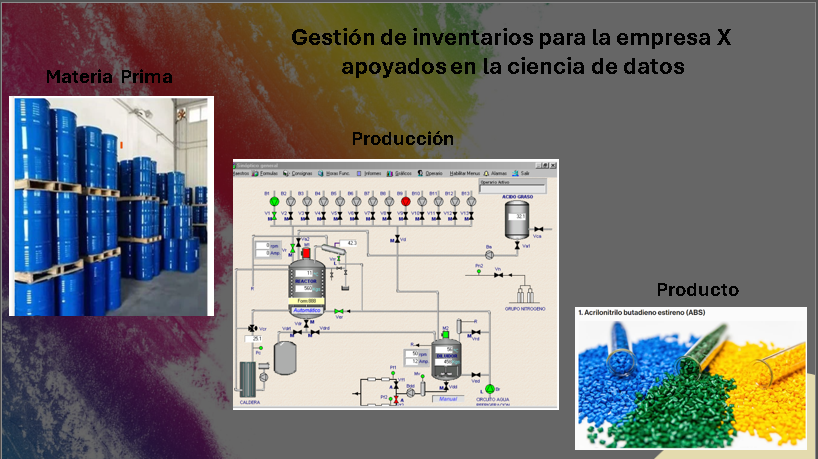

La empresa X, desde hace 10 años, se dedica a la fabricación de productos para la construcción como: resinas acrílicas, pinturas industriales, recubrimientos para madera, entre otros; y lo hacen procesando las siguientes materias primas: Soda, Xilol, Toluol, 2EHA, Vam, Butil, Ethil, Metil y Estireno. Para la empresa la precisión en el control de inventarios sobre estos insumos es esencial, ya que las materias primas son costosas y altamente sensibles a las condiciones de almacenamiento. La empresa ha experimentado inconsistencias en estos inventarios, afectando la eficiencia de la producción y su estado financiero.

Es claro que actualmente, la empresa enfrenta problemas de gestión de inventario. A pesar de contar con un sistema automático de control de materiales, existen diferencias significativas entre el inventario registrado en almacén y el consumo reportado en producción, lo que ha generado pérdidas financieras y operativas como: (tiempo del recurso humano, costos por almacenamiento, costo logístico y por desabastecimiento). La falta de un sistema de monitoreo en tiempo real y métodos adecuados para prever la demanda ha llevado a frecuentes desajustes. Estos desajustes pueden deberse a errores en el registro de los datos de entrada (SP) en el controlador de los reactores manipulado por parte de los operarios, solo cuándo la producción está en modo semiautomático o también se dan por problemas en la trazabilidad de los lotes de las materias primas. Esto ha generado tiempos de espera en producción, altos costos de almacenamiento para materias primas que no se usan de inmediato y está impactando la rentabilidad y la competitividad de la empresa.


Este proyecto se enfocará en el diseño e implementación de un sistema de control de inventarios que permita la planificación eficiente de las materias primas. Para ello, se cuenta con una base de datos en tiempo real, con información de recetas y adiciones manuales que realizan los operarios en modo semiautomático para la producción.
El objetivo del proyecto será analizar estos datos para encontrar:
Patrones de consumo para encontrar inconsistencias.
Identificar las causas de las variaciones que hay en los inventarios y los reportes de producción.
Desarrollar un modelo predictivo para optimizar la gestión de inventarios, alineando el inventario disponible del almacén con la demanda real de la producción.
Causas y efectos
Las causas del problema incluyen la falta de un sistema de monitoreo continuo, prácticas de compra sin planeación y una previsión de demanda insuficiente. Los efectos de estos problemas se manifiestan en mayores costos, tiempos de producción detenidos y afectación de la rentabilidad de la empresa.

**Variables**

Se deben analizar las variables numericas:
 - Set Point(Solicitudes de materias primas en kg, se abrevia generalmente como SP)
 - Consumo (La metrica del consumo de los sensores de flujo másico, se abrevia como PV)

Se deben analizar variables categoricas como:
 - Solicitudes, partidas o lotes
 - Equipos(los cuales hacen referencia a reactores, tanques o diluidores)
 - Tipo de Solicitud(Receta o semiautomatico)

Se analizan en tiempo ya que son variables que se almacenan en funcion del tiempo
 - TimeStamp

 **Materias Primas**
1. Soda
2. Xilo
3. Toluol
4. 2EHA
5. Vam
6. Butil
7. Ethil
8. Metil
9. Estireno

##1.1) Impacto generado y flujo de trabajo

- **Impacto generado por las diferencias en los medidores de flujo de Materias Primas**

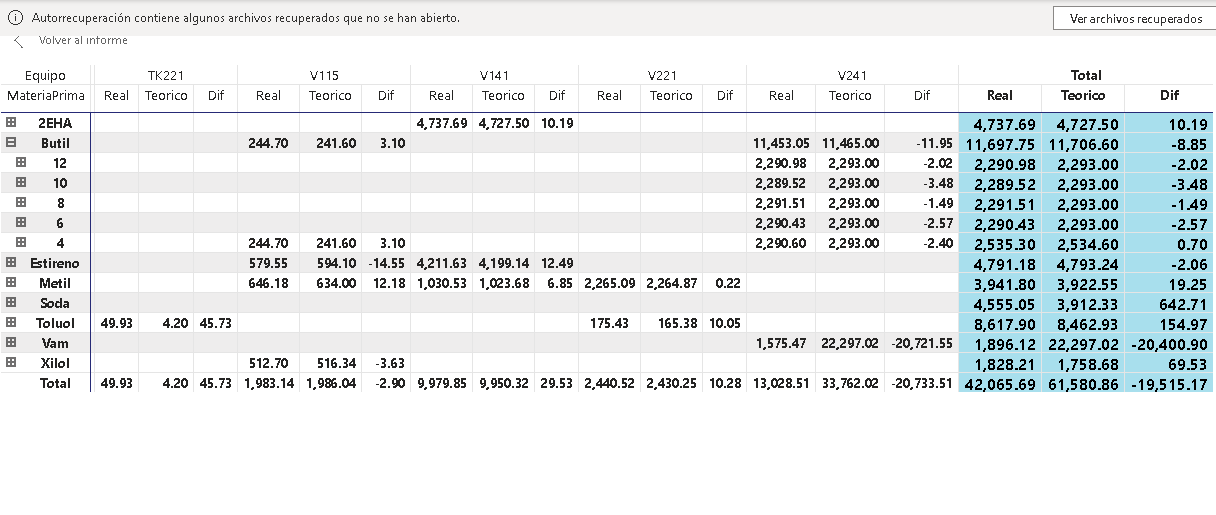

**Flujo de Trabajo**

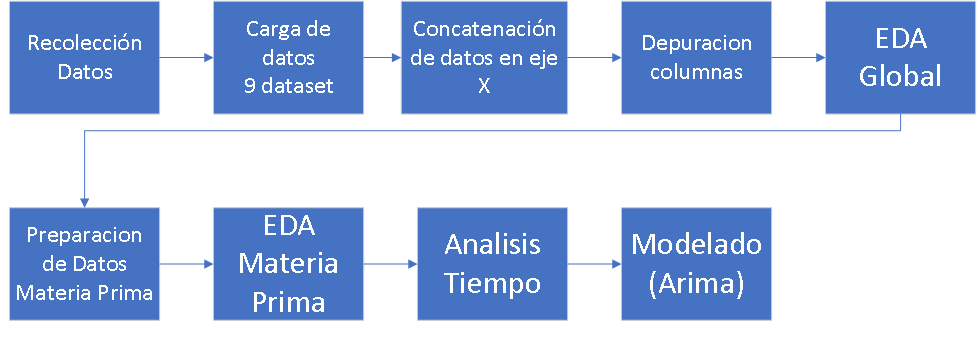

##2). Carga de datos

##2.1) Cargando Librerias y el conjunto de datos

- **Librerias**

In [36]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import itertools
import warnings



- **Se realiza carga de Datos por medio de parametro de la materia prima, esta materia prima esta en una hoja del libro de Excel.**
- **La función devuelve el DataFrame sample_df con los datos procesados, listo para analisis adicionales**

*2.2. Carga de datos*

Se realiza carga de Datos por medio de parametro de la materia prima, esta materia prima esta en una hoja del libro de Excel. La función devuelve el DataFrame sample_df con los datos procesados, listo para análisis adicionales.

In [2]:
#2.2
archivo_excel = 'Data.xlsx'
hojas = pd.ExcelFile(archivo_excel).sheet_names
hojas.remove("Tags")
hojas.remove("MP-EQUIPO")

MateriasPrimas=tuple(hojas)


def DataMp(materiaPrima):
    # sample_df = pd.read_excel(archivo_excel, sheet_name=materiaPrima,decimal='.', header=0, usecols="C:AO", skiprows=2)
    sample_df = pd.read_csv(materiaPrima+'.csv',decimal='.', sep=',')
    sample_df['Timestamp'] = pd.to_datetime(sample_df['Timestamp'])
    sample_df.set_index('Timestamp', inplace=True)
    sample_df = sample_df.rename(columns={col: col +' ' +materiaPrima for col in sample_df.columns})
    sample_df["MateriaPrima"]=materiaPrima
    for column in sample_df.columns:
        if column.startswith('Partida'):
            sample_df[column] = sample_df[column].astype('category')

    return sample_df

MateriasPrimas

('Soda',
 'Xilol',
 'Toluol',
 '2EHA',
 'Vam',
 'Butil',
 'Ethil',
 'Metil',
 'Estireno')

- **Se genere el Data Frame por cada materia prima, invocando la funcion DataMp descrita anteriormente.**
- **Se recorre la tupla de materias primas con un for y se crea un diccionario con los data frame.**

In [3]:
sample_dfs={}
for mp in MateriasPrimas:
    print(mp)
    sample_dfs[mp]=DataMp(str(mp))


# sample_dfSoda=DataMp("Soda")
# sample_dfXilol=DataMp("Xilol")
# sample_dfToluol=DataMp("Toluol")
# sample_df2EHA=DataMp("2EHA")
# sample_dfVAM=DataMp("Vam")
# sample_dfButil=DataMp("Butil")
# sample_dfEthil=DataMp("Ethil")
# sample_dfMetil=DataMp("Metil")
# sample_dfEstireno=DataMp("Estireno")
# sample_dfSoda


sample_dfs

Soda


C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_20256\3003747941.py:12: DtypeWarning: Columns (13,15,19,21,23,25,29,31,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv(materiaPrima+'.csv',decimal='.', sep=',')


Xilol


C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_20256\3003747941.py:12: DtypeWarning: Columns (11,14,19,21,25,27,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv(materiaPrima+'.csv',decimal='.', sep=',')


Toluol


C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_20256\3003747941.py:12: DtypeWarning: Columns (11,19,21,25,27,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv(materiaPrima+'.csv',decimal='.', sep=',')


2EHA
Vam
Butil


C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_20256\3003747941.py:12: DtypeWarning: Columns (5,8,11,21,23,27,29,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv(materiaPrima+'.csv',decimal='.', sep=',')


Ethil
Metil


C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_20256\3003747941.py:12: DtypeWarning: Columns (5,8,11,21,23,27,29,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv(materiaPrima+'.csv',decimal='.', sep=',')


Estireno


C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_20256\3003747941.py:12: DtypeWarning: Columns (3,5,8,9,11,15,21,23,27,29,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv(materiaPrima+'.csv',decimal='.', sep=',')


{'Soda':                           Partida R131 Soda Estado Bombeo Semi R131 Soda  \
 Timestamp                                                                  
 2024-10-20 00:00:00+00:00        10126959.0                      No Data   
 2024-10-20 00:01:00+00:00        10126959.0                      No Data   
 2024-10-20 00:02:00+00:00        10126959.0                      No Data   
 2024-10-20 00:03:00+00:00        10126959.0                      No Data   
 2024-10-20 00:04:00+00:00        10126959.0                      No Data   
 ...                                     ...                          ...   
 2024-11-05 23:56:00+00:00        10127420.0                     Inactive   
 2024-11-05 23:57:00+00:00        10127420.0                     Inactive   
 2024-11-05 23:58:00+00:00        10127420.0                     Inactive   
 2024-11-05 23:59:00+00:00        10127420.0                     Inactive   
 2024-11-06 00:00:00+00:00        10127420.0                     Ina

- **Se realiza la concatenacion de todos los df en uno sol0 denomidado MpGlobal**

In [4]:
MpGlobal = pd.concat([df for df in sample_dfs.values()], ignore_index=True)

# MpGlobal= pd.concat([sample_dfSoda,
#                      sample_dfXilol,
#                      sample_dfToluol,
#                      sample_df2EHA,
#                      sample_dfVAM,
#                      sample_dfButil,
#                      sample_dfEthil,
#                      sample_dfMetil,
#                      sample_dfEstireno
#                      ],axis=1)
MpGlobal

Partida R131 Soda Estado Bombeo Semi R131 Soda  SP Semi R131 Soda  \
0             10126959.0                      No Data         271.414551   
1             10126959.0                      No Data         271.396240   
2             10126959.0                      No Data         271.377930   
3             10126959.0                      No Data         271.359650   
4             10126959.0                      No Data         271.341339   
...                  ...                          ...                ...   
228968               NaN                          NaN                NaN   
228969               NaN                          NaN                NaN   
228970               NaN                          NaN                NaN   
228971               NaN                          NaN                NaN   
228972               NaN                          NaN                NaN   

       Estado Bombeo Receta R131 Soda  SP Receta R131 Soda  Consumo R131 Soda  \
0                             No Data           1235.75842         1287.88184   
1                             No Data           1235.72510         1287.88184   
2                             No Data           1235.69177         1287.88184   
3                             No Data           1235.65833         1287.88184   
4                             No Data           1235.62500         1287.88184   
...                               ...                  ...                ...   
228968                            NaN                  NaN                NaN   
228969                            NaN                  NaN                NaN   
228970                            NaN                  NaN                NaN   
228971                            NaN                  NaN                NaN   
228972                            NaN                  NaN                NaN   

       Partida TK131 Soda Estado Bombeo Semi TK131 Soda  SP Semi TK131 Soda  \
0              12345678.0                       No Data          744.822632   
1              12345678.0                       No Data          744.892200   
2              12345678.0                       No Data          744.961853   
3              12345678.0                       No Data          745.031433   
4              12345678.0                       No Data          745.101000   
...                   ...                           ...                 ...   
228968                NaN                           NaN                 NaN   
228969                NaN                           NaN                 NaN   
228970                NaN                           NaN                 NaN   
228971                NaN                           NaN                 NaN   
228972                NaN                           NaN                 NaN   

        Consumo TK131 Soda  ... SP Semi V221 Estireno  \
0                 655.0312  ...                   NaN   
1                 655.0312  ...                   NaN   
2                 655.0312  ...                   NaN   
3                 655.0312  ...                   NaN   
4                 655.0312  ...                   NaN   
...                    ...  ...                   ...   
228968                 NaN  ...                   0.0   
228969                 NaN  ...                   0.0   
228970                 NaN  ...                   0.0   
228971                 NaN  ...                   0.0   
228972                 NaN  ...                   0.0   

       Estado Bombeo Receta V221 Estireno SP Receta V221 Estireno  \
0                                     NaN                     NaN   
1                                     NaN                     NaN   
2                                     NaN                     NaN   
3                                     NaN                     NaN   
4                                     NaN                     NaN   
...                                   ...                     ...   
2289

##3) Analisis Exploratorio de datos

##3.1) Estadística descriptiva.

- **EDA de Materia Prima Soda**

In [5]:
# MpGlobal.describe()
pd.set_option('display.max_columns', None)

MpGlobalDrop = MpGlobal.select_dtypes(include=['number'])
MpGlobalDrop = MpGlobalDrop.loc[:, (MpGlobalDrop != 0.0).any(axis=0)]
MpGlobalDrop = MpGlobalDrop.loc[:, MpGlobalDrop.nunique() > 1]
MpGlobalDrop = MpGlobalDrop.dropna(axis=1, how='all')

# MpGlobalDrop=MpGlobalDrop.drop(columns=['SP Receta R141 Soda','Consumo R141 Soda','SP Receta V142 Soda','Consumo V142 Soda','SP Semi TK141 Soda','Consumo TK141 Soda','Partida R221 Soda','SP Receta R111 Xilol','Consumo R111 Xilol','SP Semi V221 Estireno','SP Receta V221 Estireno','SP Semi V131 Estireno','SP Receta V131 Estireno','Consumo V131 Estireno','SP Semi V241 Estireno','SP Receta V241 Estireno','SP Semi D122 Estireno','SP Receta D122 Estireno','SP Receta V115 Estireno','Consumo D122 Estireno','SP Semi R221 Xilol','SP Receta R221 Xilol','Consumo R221 Xilol','Consumo V221 Xilol','Partida TK221 Xilol','Partida R221 Xilol'])
MpGlobalDrop.describe()


SP Semi R131 Soda  SP Receta R131 Soda  Consumo R131 Soda  \
count       24481.000000         24481.000000       24481.000000   
mean           87.116412          1097.486710        1171.076688   
std            85.727140           164.486350         243.657315   
min            12.000000           793.016846           0.000000   
25%            12.000000           952.406500        1287.870480   
50%            47.435852          1111.796140        1287.873170   
75%           159.425200          1287.870000        1287.889400   
max           271.414551          1287.870000        1287.893680   

       SP Semi TK131 Soda  Consumo TK131 Soda  Consumo V142 Soda  \
count        24481.000000        24481.000000       24481.000000   
mean           744.499488          712.915003         698.133033   
std            427.881422          637.830468           0.269442   
min              1.105362            0.000000         698.095337   
25%            650.072700          357.583740         698.095337   
50%            660.000000          655.031200         698.095337   
75%            789.971400          660.016300         698.095337   
max           2549.885740         2550.031740         700.058838   

       Consumo R221 Soda  Consumo TK221 Soda  SP Semi R111 Xilol  \
count       24481.000000        24481.000000        25532.000000   
mean         1290.824561          619.623981          112.429709   
std           779.281300          821.838599          116.097811   
min             2.999031            0.000000            5.000000   
25%           300.041229          110.000305            5.000000   
50%          1959.967770          295.028961           65.425125   
75%          1959.967770          295.028961          241.334152   
max          1959.967770         2314.993410          349.986664   

       SP Receta R111 Xilol  Consumo R111 Xilol  SP Semi V115 Xilol  \
count          25532.000000        25532.000000        25532.000000   
mean             674.212250           90.348911           45.176726   
std              189.263217          179.138973           48.443834   
min               15.518298            0.003752            5.000000   
25%              642.769738            0.059846            5.000000   
50%              778.000000            0.139196           16.803338   
75%              778.000000           93.669595           84.838871   
max              825.947632          825.466858          152.874400   

       Consumo V115 Xilol  SP Semi TK112 Xilol  Consumo TK112 Xilol  \
count        25532.000000         25532.000000         25532.000000   
mean            30.058694            71.201418            54.465152   
std             44.392514            71.690233            73.953069   
min              0.000002             0.000724             0.000125   
25%              0.194071            13.432715             1.045015   
50%              6.447244            23.787275             9.552092   
75%             43.453246           170.000000           170.035492   
max            193.943039           170.000000           170.035492   

       Consumo R221 Xilol  Consumo V221 Xilol  Consumo TK221 Xilol  \
count        25532.000000        25532.000000         25532.000000   
mean            65.179301          325.030698            65.944190   
std             47.503781           37.074715            19.060929   
min              0.000000           -0.121704            39.914830   
25%              0.000000          273.278870            39.914830   
50%             99.983215          351.410645            79.901690   
75%             99.983215          351.410645            79.901690   
max             99.983215          352.019100            79.901690   

       Consumo R111 Toluol  SP Semi V115 Toluol  Consumo V115 Toluol  \
count         25544.000000         25544.000000         25544.000000   
mean            200.025283            52.472506            39.467091   
std               0.032183            57.

*3.2. Visualización de datos*



- **Aqui podemos ver la distribución de los datos durante todo el período.**
- **Se crea una función para mostrar el histograma de cada materia prima, se pone como parametro df que es el data frame de cada materia prima y se muestra la distribución de cada serie individualmente**

array([[<Axes: title={'center': 'SP Semi R131 Soda'}>,
        <Axes: title={'center': 'SP Receta R131 Soda'}>,
        <Axes: title={'center': 'Consumo R131 Soda'}>,
        <Axes: title={'center': 'SP Semi TK131 Soda'}>,
        <Axes: title={'center': 'Consumo TK131 Soda'}>,
        <Axes: title={'center': 'Consumo V142 Soda'}>,
        <Axes: title={'center': 'Consumo R221 Soda'}>],
       [<Axes: title={'center': 'Consumo TK221 Soda'}>,
        <Axes: title={'center': 'SP Semi R111 Xilol'}>,
        <Axes: title={'center': 'SP Receta R111 Xilol'}>,
        <Axes: title={'center': 'Consumo R111 Xilol'}>,
        <Axes: title={'center': 'SP Semi V115 Xilol'}>,
        <Axes: title={'center': 'Consumo V115 Xilol'}>,
        <Axes: title={'center': 'SP Semi TK112 Xilol'}>],
       [<Axes: title={'center': 'Consumo TK112 Xilol'}>,
        <Axes: title={'center': 'Consumo R221 Xilol'}>,
        <Axes: title={'center': 'Consumo V221 Xilol'}>,
        <Axes: title={'center': 'Consumo TK22

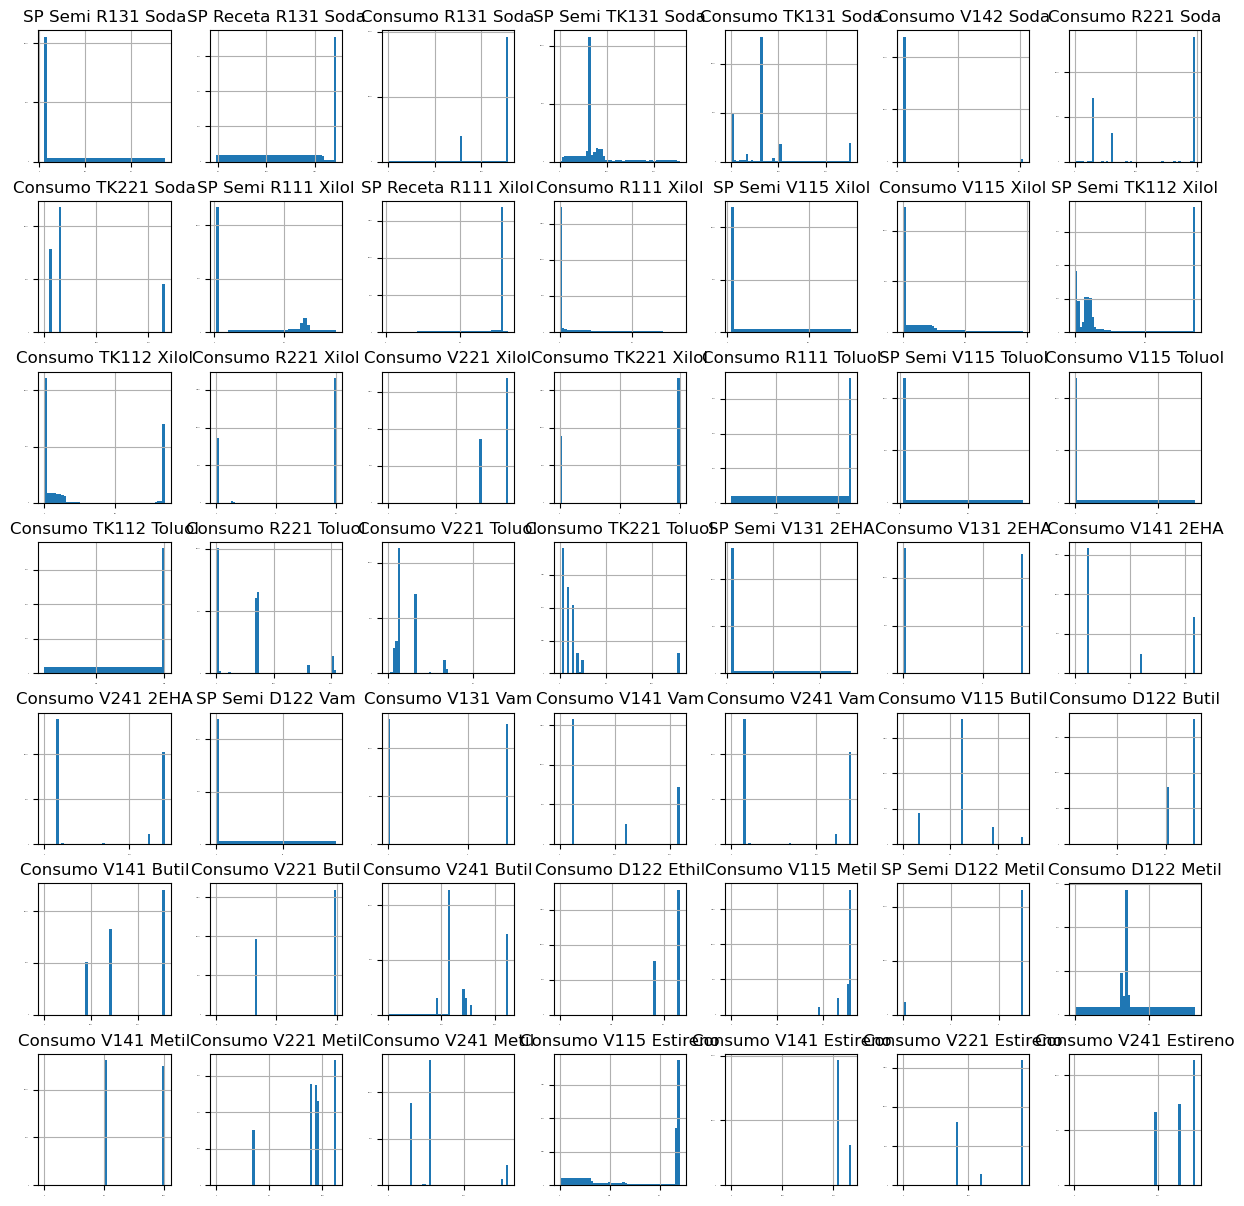

In [6]:
# def VisualizacionHis(df):
MpGlobalDrop.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,15))
    # pyplot.show()


En este histograma muestra la distribución de cada serie individualmente.

- **Distribución de densidad en la misma escala del eje x.**

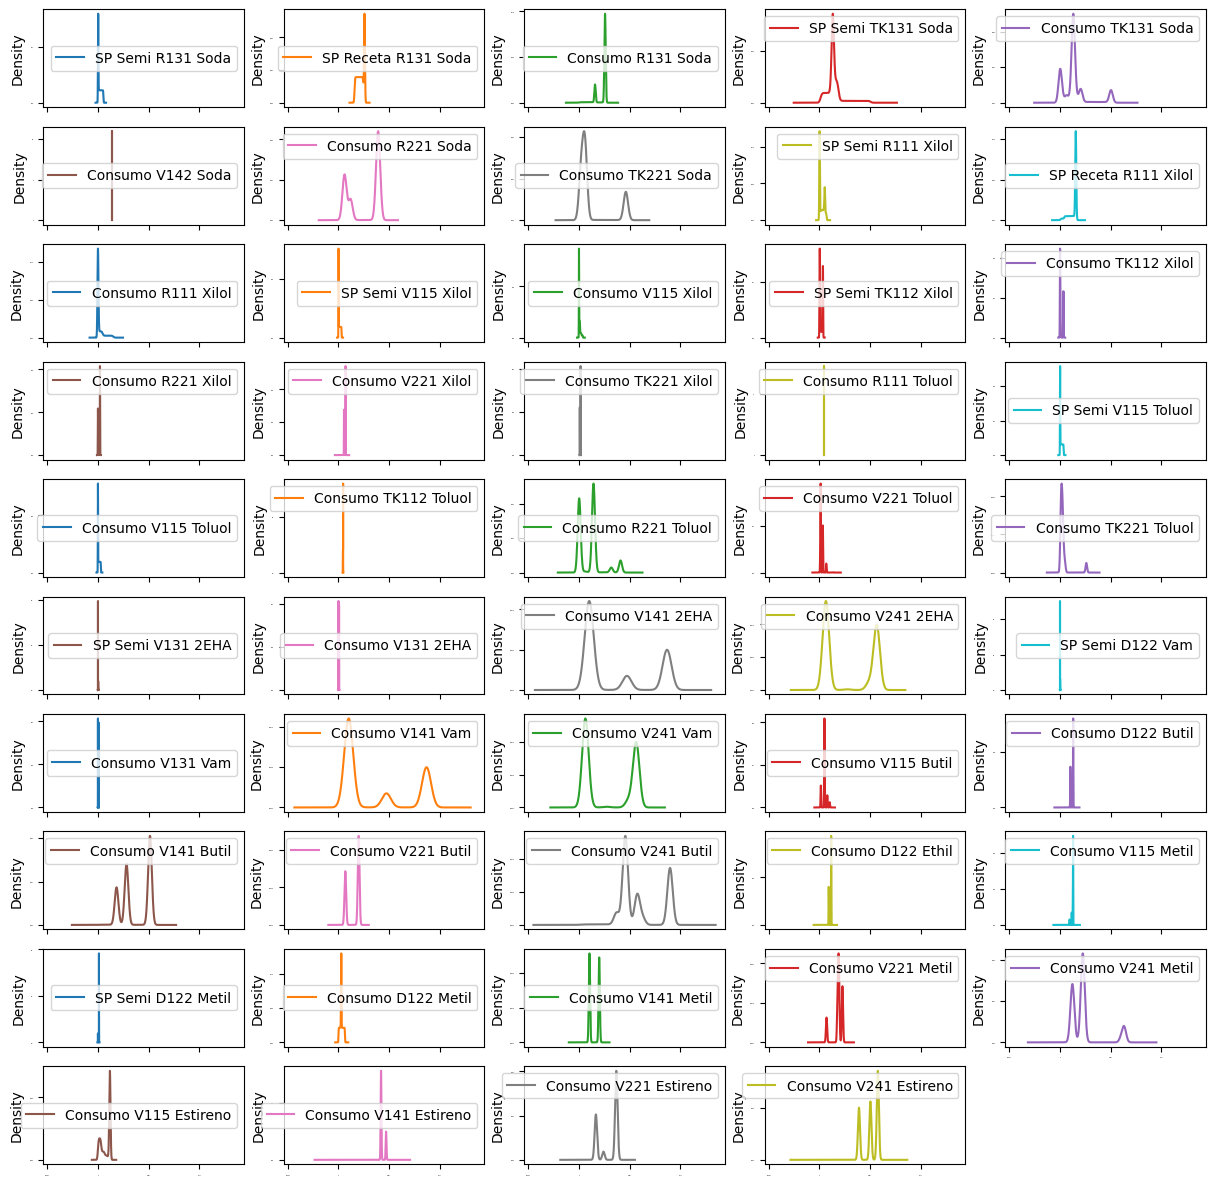

In [7]:
MpGlobalDrop.plot(kind='density', subplots=True, layout=(10,5), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

- **Para tener una idea de la interdependencia de los datos, observamos el diagrama de dispersión y la matriz de correlación.**
- **Grafico de correlacón Global**

<Axes: title={'center': 'Correlation Matrix'}>

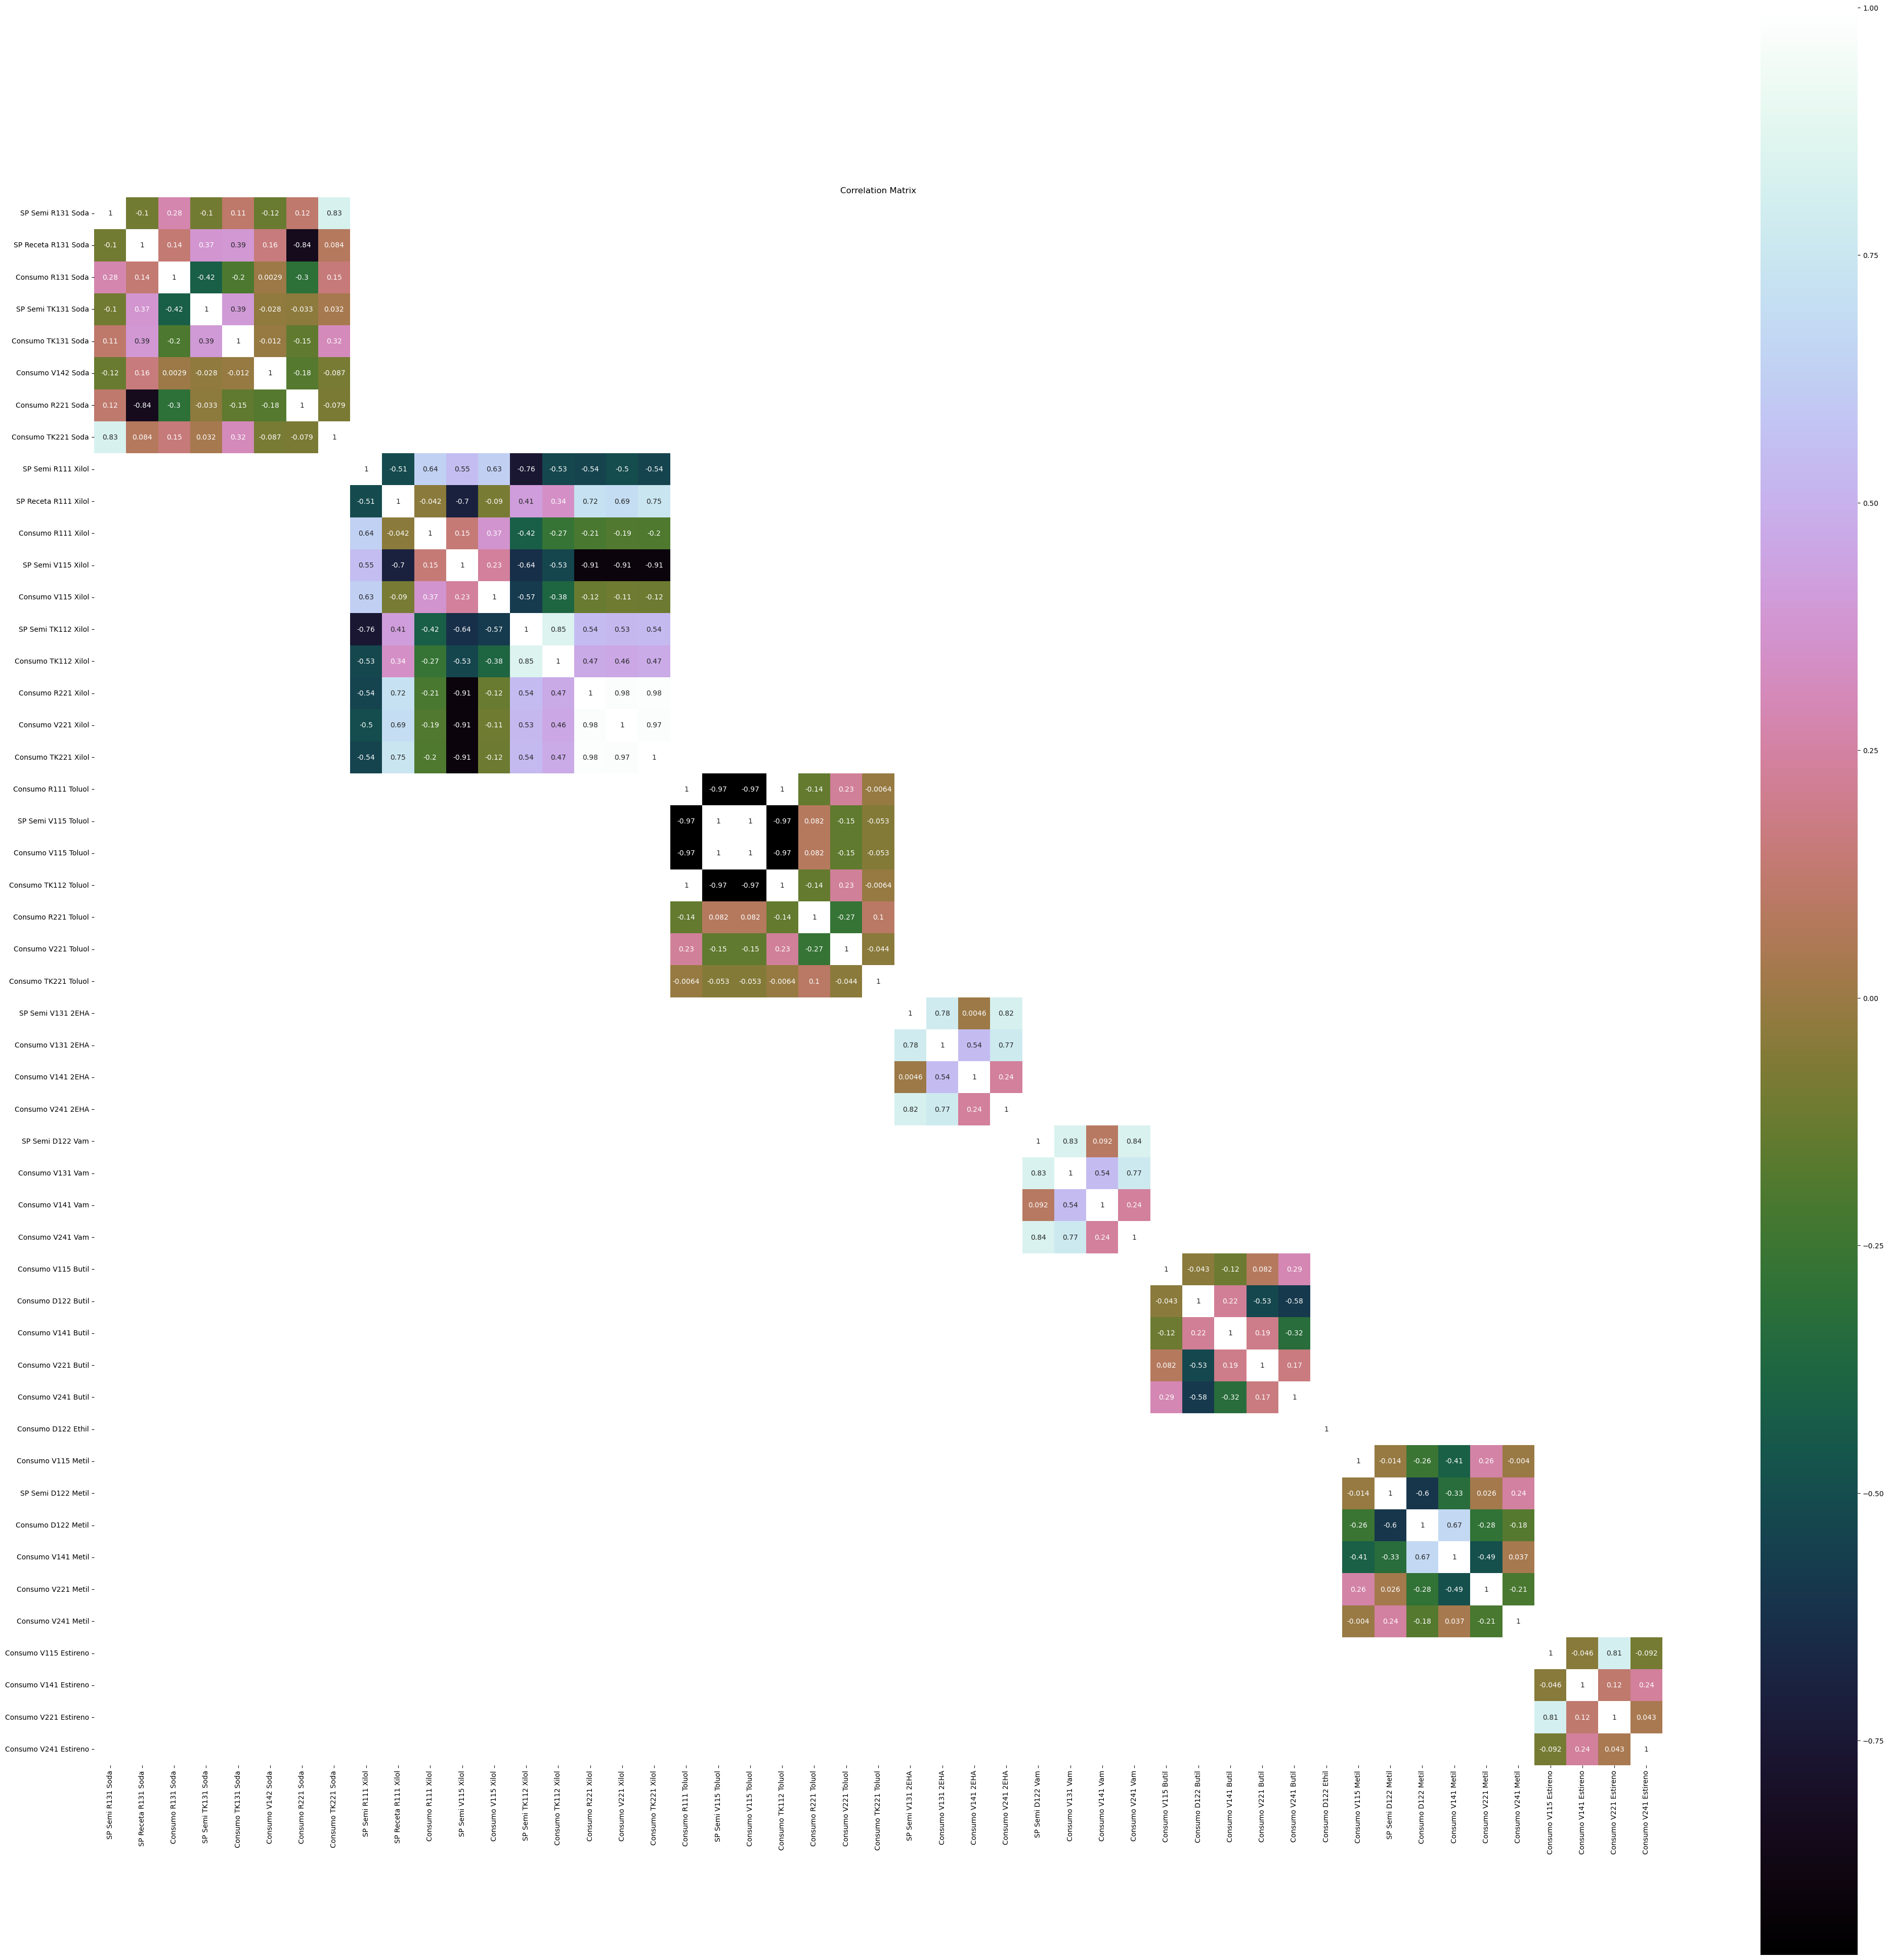

In [8]:
# def EdaCorr(df,mp):
MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Partida').columns, axis=1)
MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Estado').columns, axis=1)
MpGlobalDrop = MpGlobalDrop.replace('Bad Input', 0)
MpGlobalDrop = MpGlobalDrop.replace('Tag not found', 0)
correlation = MpGlobalDrop.corr()
pyplot.figure(figsize=(50,50))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

**Grafico de dispersion**

In [9]:

# MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Partida').columns, axis=1)
# MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Estado').columns, axis=1)
# MpGlobalDrop = MpGlobalDrop.replace('Bad Input', 0)
# MpGlobalDrop = MpGlobalDrop.replace('Tag not found', 0)
pyplot.figure(figsize=(100,100))
scatter_matrix(MpGlobalDrop,figsize=(100,100))
pyplot.show()

<Figure size 10000x10000 with 0 Axes>

# 4. Preparacion de Datos

In [10]:
def identificar_sp_activo(row, equipo, materiaPrima):
    if 'Activo_Receta' + equipo+' '+materiaPrima in row:
        if row['Activo_Receta' + equipo+' '+materiaPrima]:
            return 'SP Receta ' + equipo
        elif row['Activo_Semi' + equipo+' '+materiaPrima]:
            return 'SP Semi ' + equipo
        else:
            return 'Ninguno'
    elif 'Activo_Semi' + equipo+' '+materiaPrima in row:
        if row['Activo_Semi' + equipo+' '+materiaPrima]:
            return 'SP Semi ' + equipo
    return 'Ninguno'



# Identificar si el bombeo está activo
def CalculoMP(equipo,sample_df,materiaPrima):
    sample_df['Time_Stamp'] = sample_df.index
    sample_df['Activo_Semi' + equipo +' '+materiaPrima] = sample_df['Estado Bombeo Semi '+ equipo+' '+materiaPrima] == 'Active'
   
    if 'Estado Bombeo Receta ' + equipo+' '+materiaPrima in sample_df.columns:
        sample_df['Activo_Receta' + equipo+' '+materiaPrima] = sample_df['Estado Bombeo Receta '+ equipo+' '+materiaPrima] == 'Active'


    # Crear una columna que identifique el nuevo SP activo
    # Aplicar la función para identificar el SP activo en cada momento
    # sample_df['SP_Activo' + equipo] = sample_df.apply(identificar_sp_activo, axis=1)
    sample_df['SP_Activo' + equipo+' '+materiaPrima] = sample_df.apply(identificar_sp_activo, axis=1, args=(equipo,materiaPrima,))


    # Crear una columna con el valor del SP activo en cada momento
    sample_df['Valor_SP_Activo'] = sample_df.apply(
        lambda row: row['SP Receta ' + equipo+' '+materiaPrima] if row['SP_Activo' + equipo+' '+materiaPrima] == 'SP Receta ' + equipo
        else (row['SP Semi ' + equipo+' '+materiaPrima] if row['SP_Activo' + equipo+' '+materiaPrima] == 'SP Semi ' + equipo else 0),
        axis=1
    )
    # print("sp activo")
    # print (sample_df['SP Semi ' + equipo+' '+materiaPrima].unique())

    # Identificar cambios en el SP activo (cada vez que se activa uno nuevo)
    sample_df['Cambio_SP_Activo'] = sample_df['SP_Activo' + equipo+' '+materiaPrima].shift(1) != sample_df['SP_Activo' + equipo+' '+materiaPrima]
    sample_df['Consumo R131_1'] = sample_df['Consumo ' + equipo+' '+materiaPrima].shift(-1)

    # Crear un número de solicitud único para cada nuevo SP activo
    sample_df['Solicitud'] = sample_df['Cambio_SP_Activo'].cumsum()
    
    # Agrupar los sample_df por solicitud y obtener los valores finales de SP y PV
    resultadoR131 = sample_df[sample_df['SP_Activo' + equipo+' '+materiaPrima] != 'Ninguno'].groupby('Solicitud').agg(
        SP_Activo_Final=('SP_Activo' + equipo+' '+materiaPrima, 'last'),
        Valor_SP_Final=('Valor_SP_Activo', 'max'),  # Tomar el máximo de los valores de SP para cada carga
        PV_Final=('Consumo R131_1', 'last'),  # Tomar el último PV del grupo
        Time_Stamp=('Time_Stamp', 'last'),
        MateriaPrima=("MateriaPrima","last")
).reset_index()
    
    resultadoR131["Time_Stamp"] = resultadoR131["Time_Stamp"].dt.strftime('%Y-%m-%d %H:%M:%S')
    resultadoR131 = resultadoR131.set_index('Time_Stamp')
    resultadoR131["Equipo"]=equipo
    resultadoR131["Solicitud"].astype('category')
    resultadoR131["PV_Final"]=pd.to_numeric(resultadoR131["PV_Final"])
    resultadoR131["Valor_SP_Final"]=pd.to_numeric(resultadoR131["Valor_SP_Final"])
    return resultadoR131
    # # Sumar todos los valores para cada carga y agregar un total
    # suma_filas = resultadoR131[['Valor_SP_Final', 'PV_Final']].sum().to_frame().T
    # suma_filas['SP_Activo_Final'] = 'Total ' + equipo
    # suma_filas['Solicitud'] = ' '

    # # Concatenar la fila de suma al DataFrame original
    # resultadoSoda_con_sumaR131Soda = pd.concat([resultadoSodaR131, suma_filas], ignore_index=True)
    # # resultadoSoda_con_sumaR131Soda=resultadoSoda

    # # Ordenar el resultadoSoda final para que sea más legible
    # resultado_con_sumaR131Soda = resultadoSod_con_sumaR131Soda[['Solicitud', 'SP_Activo_Final', 'Valor_SP_Final', 'PV_Final']]
    # resultado_con_sumaR131Soda["Equipo"]="R131"
    # # Verificar el resultado
    # return resultado_con_sumaR131Soda


4.1 Materia Prima Soda

In [11]:
resultadoSodaR131=CalculoMP("R131",sample_dfs["Soda"],"Soda")

resultadoSodaTK131=CalculoMP("TK131",sample_dfs["Soda"],"Soda")
resultadoSodaR141=CalculoMP("TK141",sample_dfs["Soda"],"Soda")
resultadoSodaV142=CalculoMP("V142",sample_dfs["Soda"],"Soda")
resultadoSodaTk141=CalculoMP("TK141",sample_dfs["Soda"],"Soda")
resultadoSodaR221=CalculoMP("R221",sample_dfs["Soda"],"Soda")
resultadoSodaTK221=CalculoMP("TK221",sample_dfs["Soda"],"Soda")

resultadoSoda=pd.concat([resultadoSodaR131,
                      resultadoSodaTK131,
                      resultadoSodaR141,
                      resultadoSodaV142,
                      resultadoSodaTk141,
                      resultadoSodaR221,
                      resultadoSodaTK221])
resultadoSoda

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-22 19:44:00          2  SP Receta R131     1100.987790  1287.890870   
2024-10-23 03:41:00          4  SP Receta R131     1086.943600  1287.476320   
2024-10-23 11:46:00          6  SP Receta R131     1070.764530  1287.889400   
2024-10-24 12:06:00          8  SP Receta R131     1022.060240  1287.872680   
2024-10-24 20:31:00         10  SP Receta R131     1005.213930  1287.883180   
2024-10-25 04:49:00         12  SP Receta R131      988.601100  1287.870480   
2024-10-25 13:42:00         14  SP Receta R131      970.820700  1287.891000   
2024-10-28 21:38:00         16  SP Receta R131      810.797241  1287.893680   
2024-10-29 06:23:00         18  SP Receta R131      801.373800   793.015900   
2024-10-29 15:45:00         20  SP Receta R131      868.130859   793.013700   
2024-10-30 01:04:00         22  SP Receta R131      934.531600   793.007600   
2024-10-30 10:38:00         24  SP Receta R131     1002.714110   793.007300   
2024-11-01 03:59:00         26  SP Receta R131     1287.870000  1287.886350   
2024-11-01 13:34:00         28  SP Receta R131     1287.870000  1287.887210   
2024-11-01 21:40:00         30  SP Receta R131     1287.870000  1287.203610   
2024-11-05 19:44:00         32  SP Receta R131     1287.870000  1287.893430   
2024-10-22 22:26:00          2   SP Semi TK131      662.679100  2500.017330   
2024-10-23 04:55:00          4   SP Semi TK131      574.968800   655.009900   
2024-10-23 12:55:00          6   SP Semi TK131      654.998400   655.018738   
2024-10-24 00:39:00          8   SP Semi TK131      653.208200   655.017334   
2024-10-24 21:41:00         10   SP Semi TK131      650.541200   649.540000   
2024-10-25 05:51:00         12   SP Semi TK131      654.931600   650.015869   
2024-10-25 14:45:00         14   SP Semi TK131      659.716200   650.051100   
2024-10-25 15:47:00         16   SP Semi TK131      659.995300   330.017334   
2024-10-26 03:44:00         18   SP Semi TK131      647.863900   650.014000   
2024-10-26 05:10:00         20   SP Semi TK131      599.906700    10.023966   
2024-10-29 07:32:00         22   SP Semi TK131      665.174400   652.016800   
2024-10-29 17:10:00         24   SP Semi TK131      850.090200  1030.023930   
2024-10-30 02:41:00         26   SP Semi TK131      242.091431  1029.731000   
2024-10-30 12:10:00         28   SP Semi TK131     1163.701290  1030.012000   
2024-10-30 21:30:00         30   SP Semi TK131     1987.638000  1029.943730   
2024-10-31 05:49:00         32   SP Semi TK131     2471.501710  2499.840000   
2024-10-31 05:58:00         34   SP Semi TK131       76.595740    19.615519   
2024-10-31 12:11:00         36   SP Semi TK131     2431.270260  1640.315060   
2024-10-31 13:16:00         38   SP Semi TK131     1113.414430   890.020752   
2024-10-31 22:15:00         40   SP Semi TK131     2548.337000  2550.031740   
2024-11-01 07:04:00         42   SP Semi TK131     1642.745730  2549.857180   
2024-11-01 14:39:00         44   SP Semi TK131      660.000000   660.013600   
2024-11-01 22:42:00         46   SP Semi TK131      660.000000   659.506958   
2024-11-01 01:12:00          2    SP Semi R221       58.942787   300.041229   
2024-10-23 08:20:00          2   SP Semi TK221      295.000000   295.028961   
2024-10-31 13:07:00          4   SP Semi TK221      110.000000   110.000305   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-22 19:44:00         Soda   R131  
2024-10-23 03:41:00         Soda   R131  
2024-10-23 11:46:00         Soda   R131  
2024-10-24 12:06:00         Soda   R131  
2024-10-24 20:31:00         Soda   R131  
2024-10-25 04:49:00         Soda   R131  
2024-10-25 13:42:00         Soda   R131  
2024-10-28 21:38:00         Soda   R131  
2024-10-29 06:23:00         Soda   R131  
2024-10-29 15:45:00         Soda   R131  
2024-10-30 01:04:00         Soda   R131 

In [12]:
pivot_tableSoda = resultadoSoda.pivot_table(values=['Valor_SP_Final', 'PV_Final'], index=['Equipo','Solicitud','SP_Activo_Final'], aggfunc='sum', margins=True, margins_name='Total')
pivot_tableSoda["Diferencia"]=pivot_tableSoda["Valor_SP_Final"]-pivot_tableSoda["PV_Final"]
pivot_tableSoda

PV_Final  Valor_SP_Final   Diferencia
Equipo Solicitud SP_Activo_Final                                           
R131   2         SP Receta R131    1287.890870     1100.987790  -186.903080
       4         SP Receta R131    1287.476320     1086.943600  -200.532720
       6         SP Receta R131    1287.889400     1070.764530  -217.124870
       8         SP Receta R131    1287.872680     1022.060240  -265.812440
       10        SP Receta R131    1287.883180     1005.213930  -282.669250
       12        SP Receta R131    1287.870480      988.601100  -299.269380
       14        SP Receta R131    1287.891000      970.820700  -317.070300
       16        SP Receta R131    1287.893680      810.797241  -477.096439
       18        SP Receta R131     793.015900      801.373800     8.357900
       20        SP Receta R131     793.013700      868.130859    75.117159
       22        SP Receta R131     793.007600      934.531600   141.524000
       24        SP Receta R131     793.007300     1002.714110   209.706810
       26        SP Receta R131    1287.886350     1287.870000    -0.016350
       28        SP Receta R131    1287.887210     1287.870000    -0.017210
       30        SP Receta R131    1287.203610     1287.870000     0.666390
       32        SP Receta R131    1287.893430     1287.870000    -0.023430
R221   2         SP Semi R221       300.041229       58.942787  -241.098442
TK131  2         SP Semi TK131     2500.017330      662.679100 -1837.338230
       4         SP Semi TK131      655.009900      574.968800   -80.041100
       6         SP Semi TK131      655.018738      654.998400    -0.020338
       8         SP Semi TK131      655.017334      653.208200    -1.809134
       10        SP Semi TK131      649.540000      650.541200     1.001200
       12        SP Semi TK131      650.015869      654.931600     4.915731
       14        SP Semi TK131      650.051100      659.716200     9.665100
       16        SP Semi TK131      330.017334      659.995300   329.977966
       18        SP Semi TK131      650.014000      647.863900    -2.150100
       20        SP Semi TK131       10.023966      599.906700   589.882734
       22        SP Semi TK131      652.016800      665.174400    13.157600
       24        SP Semi TK131     1030.023930      850.090200  -179.933730
       26        SP Semi TK131     1029.731000      242.091431  -787.639569
       28        SP Semi TK131     1030.012000     1163.701290   133.689290
       30        SP Semi TK131     1029.943730     1987.638000   957.694270
       32        SP Semi TK131     2499.840000     2471.501710   -28.338290
       34        SP Semi TK131       19.615519       76.595740    56.980221
       36        SP Semi TK131     1640.315060     2431.270260   790.955200
       38        SP Semi TK131      890.020752     1113.414430   223.393678
       40        SP Semi TK131     2550.031740     2548.337000    -1.694740
       42        SP Semi TK131     2549.857180     1642.745730  -907.111450
       44        SP Semi TK131      660.013600      660.000000    -0.013600
       46        SP Semi TK131      659.506958      660.000000     0.493042
TK221  2         SP Semi TK221      295.028961      295.000000    -0.028961
       4         SP Semi TK221      110.000305      110.000000    -0.000305
Total                             42976.307044    40209.731878 -2766.575166

4.2 Materia Prima Xilol

In [13]:
resultadoXilolR111=CalculoMP("R111",sample_dfs["Xilol"],"Xilol")
resultadoXilolV115=CalculoMP("V115",sample_dfs["Xilol"],"Xilol")
resultadoXilolTK112=CalculoMP("TK112",sample_dfs["Xilol"],"Xilol")
resultadoXilolR221=CalculoMP("R221",sample_dfs["Xilol"],"Xilol")
resultadoXilolV221=CalculoMP("V221",sample_dfs["Xilol"],"Xilol")
resultadoXilolTK221=CalculoMP("TK221",sample_dfs["Xilol"],"Xilol")


resultadoXilol=pd.concat([resultadoXilolR111,
                resultadoXilolV115,
                resultadoXilolTK112,
                resultadoXilolR221,
                resultadoXilolV221,
                resultadoXilolTK221
                ])
resultadoXilol

Solicitud SP_Activo_Final  Valor_SP_Final    PV_Final  \
Time_Stamp                                                                   
2024-10-23 01:25:00          2  SP Receta R111      782.970800  770.544100   
2024-10-23 02:09:00          4    SP Semi R111       40.056120   39.984990   
2024-10-23 08:45:00          6    SP Semi R111      269.965424  263.285461   
2024-10-23 09:26:00          8  SP Receta R111      717.913700  717.097168   
2024-10-23 15:30:00         10  SP Receta R111       18.477314   17.872704   
2024-10-23 16:59:00         12    SP Semi R111      250.022110  249.805237   
2024-10-23 18:03:00         14  SP Receta R111      717.335266  716.445862   
2024-10-24 01:38:00         16    SP Semi R111      260.296021  246.729111   
2024-10-24 02:09:00         18  SP Receta R111      717.600952  716.856262   
2024-10-24 08:14:00         20  SP Receta R111       18.695280   17.916126   
2024-10-24 09:49:00         22    SP Semi R111      269.967500  265.923248   
2024-10-24 10:13:00         24  SP Receta R111      716.779541  718.041000   
2024-10-24 17:56:00         26    SP Semi R111      250.066000  247.461136   
2024-10-24 18:41:00         28  SP Receta R111      717.028800  716.160600   
2024-10-25 00:50:00         30  SP Receta R111       40.536070   16.387018   
2024-10-25 02:45:00         32    SP Semi R111      283.457031  243.048000   
2024-10-25 03:20:00         34  SP Receta R111      783.300964  782.129100   
2024-10-25 10:39:00         36    SP Semi R111      313.376434  244.817184   
2024-10-25 11:24:00         38  SP Receta R111      825.208600  825.466858   
2024-10-25 20:22:00         40    SP Semi R111      349.820282  345.705841   
2024-10-25 20:52:00         42  SP Receta R111      824.161560  824.368652   
2024-10-26 03:07:00         44  SP Receta R111       19.320280   14.899676   
2024-10-26 04:34:00         46    SP Semi R111      300.383400  342.877869   
2024-10-26 05:22:00         48  SP Receta R111      778.000000  777.599854   
2024-10-26 12:55:00         50    SP Semi R111      250.023500  249.168350   
2024-10-26 13:38:00         52  SP Receta R111      778.000000  777.553800   
2024-10-26 21:11:00         54    SP Semi R111      210.035300  210.233536   
2024-10-28 03:35:00         56  SP Receta R111      778.000000  777.125400   
2024-10-28 11:09:00         58    SP Semi R111      269.972000  264.261627   
2024-10-28 11:46:00         60  SP Receta R111      778.000000  777.599800   
2024-10-28 19:05:00         62    SP Semi R111      194.386078  269.949066   
2024-10-29 14:59:00         64  SP Receta R111      778.000000    0.004272   
2024-10-23 06:32:00          2  SP Receta V115      189.613373  188.745361   
2024-10-24 07:03:00          4  SP Receta V115       91.737950   89.865620   
2024-10-24 07:39:00          6  SP Receta V115       50.021324   49.786705   
2024-10-24 15:08:00          8  SP Receta V115       91.940520   91.791290   
2024-10-24 23:37:00         10  SP Receta V115       92.151630   91.072090   
2024-10-25 01:07:00         12  SP Receta V115      130.137634  129.734268   
2024-10-25 08:26:00         14  SP Receta V115      189.849300  189.667343   
2024-10-25 17:07:00         16  SP Receta V115      103.002449  102.894432   
2024-10-26 01:58:00         18  SP Receta V115      124.640526  101.268562   
2024-10-26 03:45:00         20  SP Receta V115      129.002991  128.446400   
2024-10-26 10:19:00         22  SP Receta V115      193.668533  192.965100   
2024-10-26 12:44:00         24  SP Receta V115      129.074692  128.678024   
2024-10-26 18:48:00         26  SP Receta V115      193.994690  193.943039   
2024-10-28 04:12:00         28  SP Receta V115      129.028366  128.804688   
2024-10-28 08:42:00         30  SP Receta V115      193.770300  191.960220   
2024-10-28 09:35:00         32  SP Receta V115      129.040909  128.799545   
2024-10-28 16:43:00         34  SP Receta V115      194.000000  193.910446   
2024-10-29 15:16:00         36    SP Semi V

4.3 Materia Prima Touluol

In [14]:
resultadoToluolR111=CalculoMP("R111",sample_dfs["Toluol"],"Toluol")
resultadoToluolV115=CalculoMP("V115",sample_dfs["Toluol"],"Toluol")
resultadoToluolTK112=CalculoMP("TK112",sample_dfs["Toluol"],"Toluol")
resultadoToluolR221=CalculoMP("R221",sample_dfs["Toluol"],"Toluol")
resultadoToluolV221=CalculoMP("V221",sample_dfs["Toluol"],"Toluol")
resultadoToluolTK221=CalculoMP("TK221",sample_dfs["Toluol"],"Toluol")


resultadoToluol=pd.concat([resultadoToluolR111,
                resultadoToluolV115,
                resultadoToluolTK112,
                resultadoToluolR221,
                resultadoToluolV221,
                resultadoToluolTK221
                ])
resultadoToluol

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-24 04:15:00          2  SP Receta R221     1603.436000  1603.591310   
2024-10-24 04:17:00          4    SP Semi R221       69.968090    69.512010   
2024-10-24 07:39:00          6  SP Receta R221        5.051020     4.875770   
2024-10-24 11:26:00          8  SP Receta R221      359.426800   359.906677   
2024-10-24 12:23:00         10  SP Receta R221     2042.263550  2043.936160   
...                        ...             ...             ...          ...   
2024-10-27 04:39:00          8   SP Semi TK221     1299.831790  1299.944820   
2024-10-28 06:07:00         10   SP Semi TK221       26.399158    49.928326   
2024-11-01 23:55:00         12   SP Semi TK221      219.971436   219.925034   
2024-11-02 01:33:00         14   SP Semi TK221      140.000000     2.032876   
2024-11-02 01:36:00         16   SP Semi TK221      140.000000   139.093689   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-24 04:15:00       Toluol   R221  
2024-10-24 04:17:00       Toluol   R221  
2024-10-24 07:39:00       Toluol   R221  
2024-10-24 11:26:00       Toluol   R221  
2024-10-24 12:23:00       Toluol   R221  
...                          ...    ...  
2024-10-27 04:39:00       Toluol  TK221  
2024-10-28 06:07:00       Toluol  TK221  
2024-11-01 23:55:00       Toluol  TK221  
2024-11-02 01:33:00       Toluol  TK221  
2024-11-02 01:36:00       Toluol  TK221  

[61 rows x 6 columns]

4.4 Materia Prima 2EHA

In [15]:
resultado2EHAV115=CalculoMP("V115",sample_dfs["2EHA"],"2EHA")
resultado2EHAD122=CalculoMP("D122",sample_dfs["2EHA"],"2EHA")
resultado2EHAV131=CalculoMP("V131",sample_dfs["2EHA"],"2EHA")
resultado2EHAV141=CalculoMP("V141",sample_dfs["2EHA"],"2EHA")
resultado2EHAV241=CalculoMP("V241",sample_dfs["2EHA"],"2EHA")


resultado2EHA=pd.concat([
                resultado2EHAV115,
                resultado2EHAD122,
                resultado2EHAV131,
                resultado2EHAV141,
                resultado2EHAV241
                ])

resultado2EHA

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-23 15:28:00          2  SP Receta V141     4344.788570     6.281006   
2024-10-23 15:52:00          4  SP Receta V141     4343.421390  4350.210000   
2024-10-23 22:45:00          6  SP Receta V141     4230.499000  4350.209000   
2024-10-24 06:25:00          8  SP Receta V141     4104.725590  4348.050000   
2024-10-24 15:43:00         10  SP Receta V141     3952.157000  4350.406250   
2024-10-25 00:39:00         12  SP Receta V141     3805.603520  4351.190430   
2024-10-28 16:25:00         14  SP Receta V141     2363.300000  2367.666750   
2024-10-29 01:21:00         16  SP Receta V141     1965.666260  2370.021480   
2024-10-30 10:09:00         18  SP Receta V141      499.000000   506.431641   
2024-10-31 22:17:00         20  SP Receta V141      499.000000   506.039063   
2024-11-01 07:06:00         22  SP Receta V141      499.000000   506.431641   
2024-10-24 22:42:00          2  SP Receta V241     2826.773680  2827.557000   
2024-10-25 07:35:00          4  SP Receta V241     2419.928220  2825.687260   
2024-10-27 03:22:00          6  SP Receta V241      415.336731   398.880800   
2024-10-27 05:43:00          8  SP Receta V241     1366.162110  1369.154000   
2024-10-27 07:32:00         10  SP Receta V241      317.000000   315.093200   
2024-11-05 23:23:00         12  SP Receta V241     2447.000000  2446.740720   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-23 15:28:00         2EHA   V141  
2024-10-23 15:52:00         2EHA   V141  
2024-10-23 22:45:00         2EHA   V141  
2024-10-24 06:25:00         2EHA   V141  
2024-10-24 15:43:00         2EHA   V141  
2024-10-25 00:39:00         2EHA   V141  
2024-10-28 16:25:00         2EHA   V141  
2024-10-29 01:21:00         2EHA   V141  
2024-10-30 10:09:00         2EHA   V141  
2024-10-31 22:17:00         2EHA   V141  
2024-11-01 07:06:00         2EHA   V141  
2024-10-24 22:42:00         2EHA   V241  
2024-10-25 07:35:00         2EHA   V241  
2024-10-27 03:22:00         2EHA   V241  
2024-10-27 05:43:00         2EHA   V241  
2024-10-27 07:32:00         2EHA   V241  
2024-11-05 23:23:00         2EHA   V241

4.5 Materia Prima VAM

In [16]:
resultadoVamV115=CalculoMP("V115",sample_dfs["Vam"],"Vam")
resultadoVamD122=CalculoMP("D122",sample_dfs["Vam"],"Vam")
resultadoVamV131=CalculoMP("V131",sample_dfs["Vam"],"Vam")
resultadoVamV141=CalculoMP("V141",sample_dfs["Vam"],"Vam")
resultadoVamV241=CalculoMP("V241",sample_dfs["Vam"],"Vam")


resultadoVam=pd.concat([
                resultadoVamV115,
                resultadoVamD122,
                resultadoVamV131,
                resultadoVamV141,
                resultadoVamV241
                ])

resultadoVam

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-26 03:22:00          2  SP Receta D122         0.00000   320.651855   
2024-10-26 10:09:00          4  SP Receta D122         0.00000   320.651855   
2024-10-28 03:29:00          6  SP Receta D122         0.00000   320.651855   
2024-10-28 12:43:00          8  SP Receta D122         0.00000   320.651855   
2024-10-30 17:48:00         10  SP Receta D122         0.00000   320.651855   
2024-10-29 23:13:00          2  SP Receta V141      5377.98340  2370.021480   
2024-10-30 07:28:00          4  SP Receta V141      4778.93400  2370.021480   
2024-10-30 22:16:00          6  SP Receta V141      4685.13867   506.431641   
2024-10-31 04:12:00          8  SP Receta V141      4708.68945   506.431641   
2024-10-31 13:36:00         10  SP Receta V141      4746.00049   506.431641   
2024-10-31 22:13:00         12  SP Receta V141      4778.98438   100.304688   
2024-11-01 07:01:00         14  SP Receta V141      4732.20752     0.000000   
2024-11-01 16:07:00         16  SP Receta V141      4684.00000   506.431641   
2024-11-01 21:30:00         18  SP Receta V141      4684.00000   506.431641   
2024-11-02 03:33:00         20  SP Receta V141      4684.95800   506.627930   
2024-10-23 01:40:00          2  SP Receta V241      4663.65800  2825.392000   
2024-10-23 08:24:00          4  SP Receta V241      4722.85449  2825.392000   
2024-10-23 15:26:00          6  SP Receta V241      4781.98047  2825.392000   
2024-10-27 18:02:00          8  SP Receta V241      4452.08700   315.093200   
2024-10-28 03:25:00         10  SP Receta V241      4454.94600   315.093200   
2024-10-28 10:13:00         12  SP Receta V241      4457.01800   315.093200   
2024-10-28 20:18:00         14  SP Receta V241      4461.20654   315.093200   
2024-10-29 03:21:00         16  SP Receta V241      4489.89453   315.093200   
2024-10-29 09:50:00         18  SP Receta V241      4516.27637   315.093200   
2024-10-29 17:33:00         20  SP Receta V241      4547.67700   315.093200   
2024-10-30 00:59:00         22  SP Receta V241      4577.92432   315.093200   
2024-10-30 07:57:00         24  SP Receta V241      4606.27344   315.093200   
2024-10-30 15:55:00         26  SP Receta V241      4638.69100   315.093200   
2024-10-30 22:34:00         28  SP Receta V241      4665.75100   315.093200   
2024-10-31 05:29:00         30  SP Receta V241      4693.89648   315.093200   
2024-10-31 12:51:00         32  SP Receta V241      4723.87300   315.093200   
2024-10-31 20:27:00         34  SP Receta V241      4754.79900   315.093200   
2024-11-01 03:28:00         36  SP Receta V241      4782.00000   315.093200   
2024-11-06 15:29:00         38  SP Receta V241      4452.00000  2446.740720   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-26 03:22:00          Vam   D122  
2024-10-26 10:09:00          Vam   D122  
2024-10-28 03:29:00          Vam   D122  
2024-10-28 12:43:00          Vam   D122  
2024-10-30 17:48:00          Vam   D122  
2024-10-29 23:13:00          Vam   V141  
2024-10-30 07:28:00          Vam   V141  
2024-10-30 22:16:00          Vam   V141  
2024-10-31 04:12:00          Vam   V141  
2024-10-31 13:36:00          Vam   V141  
2024-10-31 22:13:00          Vam   V141  
2024-11-01 07:01:00          Vam   V141  
2024-11-01 16:07:00          Vam   V141  
2024-11-01 21:30:00          Vam   V141  
2024-11-02 03:33:00          Vam   V141  
2024-10-23 01:40:00          Vam   V241  
2024-10-23 08:24:00          Vam   V241  
2024-10-23 15:26:00          Vam   V241  
2024-10-27 18:02:00          Vam   V241  
2024-10-28 03:25:00          Vam   V241  
2024-10-28 10:13:00          Vam   V241  
2024-10-28 20:18:00          Vam   V241  
2024-10-29 03:21:00          Vam   V241  
2024-10-29 09:50:00          Vam   V241  
2024-10-29 17:33:00          Vam   V241  
2024-10-30 00:59:00          Vam   V241  


4.6 Materia Prima Butil

In [17]:
resultadoButilV115=CalculoMP("V115",sample_dfs["Butil"],"Butil")
resultadoButilD122=CalculoMP("D122",sample_dfs["Butil"],"Butil")
resultadoButilV131=CalculoMP("V131",sample_dfs["Butil"],"Butil")
resultadoButilV141=CalculoMP("V141",sample_dfs["Butil"],"Butil")
resultadoButilV241=CalculoMP("V241",sample_dfs["Butil"],"Butil")
resultadoButilV221=CalculoMP("V221",sample_dfs["Butil"],"Butil")


resultadoButil=pd.concat([
                resultadoButilV115,
                resultadoButilD122,
                resultadoButilV131,
                resultadoButilV141,
                resultadoButilV241,
                resultadoButilV221
                ])

resultadoButil

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-23 00:36:00          2  SP Receta V115      245.027924   247.265625   
2024-10-23 07:35:00          4  SP Receta V115      381.994934   385.019226   
2024-10-23 14:52:00          6  SP Receta V115      357.208984   385.007700   
2024-10-23 23:20:00          8  SP Receta V115      328.461823   385.235657   
2024-10-24 07:36:00         10  SP Receta V115      300.450300   384.853760   
2024-10-24 15:32:00         12  SP Receta V115      273.513977   384.956665   
2024-10-25 00:09:00         14  SP Receta V115      245.169647   247.107178   
2024-10-25 09:05:00         16  SP Receta V115      504.893158   507.914124   
2024-10-25 17:36:00         18  SP Receta V115      376.502500   508.039246   
2024-10-26 02:31:00         20  SP Receta V115      241.600000   244.660156   
2024-10-26 11:38:00         22  SP Receta V115      241.600000   244.698000   
2024-10-28 03:24:00         24  SP Receta V115      241.600000   244.493042   
2024-10-28 09:24:00         26  SP Receta V115      241.600000   244.702148   
2024-11-01 04:15:00          2  SP Receta D122      505.400000   511.300100   
2024-11-05 16:19:00          4  SP Receta D122      505.400000   510.850900   
2024-10-25 09:50:00          2  SP Receta V141     2567.265380  2570.435550   
2024-10-25 18:54:00          4  SP Receta V141     2488.151000  2568.668700   
2024-10-26 03:58:00          6  SP Receta V141     2408.890630  2572.791000   
2024-10-26 12:34:00          8  SP Receta V141     2333.710000  2570.435790   
2024-10-27 06:04:00         10  SP Receta V141     2180.871830  2568.865230   
2024-10-27 15:37:00         12  SP Receta V141     2097.240720  2571.416750   
2024-10-28 02:14:00         14  SP Receta V141     2004.576170  2570.043210   
2024-10-30 22:28:00         16  SP Receta V141     1407.000000  1412.905270   
2024-10-31 04:23:00         18  SP Receta V141     1407.000000  1410.942380   
2024-10-31 13:48:00         20  SP Receta V141     1407.000000  1409.568360   
2024-11-01 16:18:00         22  SP Receta V141     1407.000000  1412.905270   
2024-11-01 21:41:00         24  SP Receta V141     1407.000000  1407.801760   
2024-11-02 03:44:00         26  SP Receta V141     1421.192500  1412.316410   
2024-11-06 02:35:00         28  SP Receta V141     2567.360000  2567.883790   
2024-11-06 11:10:00         30  SP Receta V141     2567.360000  2573.772220   
2024-10-23 01:23:00          2  SP Receta V241     2018.838260  2291.153810   
2024-10-23 08:06:00          4  SP Receta V241     1941.253420  2292.392000   
2024-10-23 15:07:00          6  SP Receta V241     1877.350590  1858.284000   
2024-10-24 01:45:00          8  SP Receta V241     2916.283450  2864.850340   
2024-10-24 11:02:00         10  SP Receta V241     4499.336000  4500.143550   
2024-10-25 16:22:00         12  SP Receta V241     3145.768000  3142.387700   
2024-10-26 07:15:00         14  SP Receta V241     2868.436520  2864.940670   
2024-10-26 15:43:00         16  SP Receta V241     2908.792720  2904.399000   
2024-10-27 17:44:00         18  SP Receta V241     2292.940000  2286.963620   
2024-10-28 03:07:00         20  SP Receta V241     2254.468510  2287.529300   
2024-10-28 09:55:00         22  SP Receta V241     2226.539000  2290.596190   
2024-10-28 20:00:00         24  SP Receta V241     2185.124270  2290.432130   
2024-10-29 03:03:00         26  SP Receta V241     2156.236330  2291.514650   
2024-10-29 09:32:00         28  SP Receta V241     2129.539310  2289.522000   
2024-10-29 17:15:00         30  SP Receta V241     2097.776370  2290.875000   
2024-10-30 00:40:00         32  SP Receta V241     2067.382570  2288.529790   
2024-10-30 07:38:00         34  SP Receta V241     2038.768550  2291.736000   
2024-10-30 15:37:00         36  SP Receta V241     2005.978880  2287.463870   
2024-10-30 21:59:00         38  SP Receta V241     1979.829220  2291.06

4.7 Materia Prima Ethil

In [18]:
resultadoEthilV115=CalculoMP("V115",sample_dfs["Ethil"],"Ethil")
resultadoEthilD122=CalculoMP("D122",sample_dfs["Ethil"],"Ethil")
resultadoEthilV131=CalculoMP("V131",sample_dfs["Ethil"],"Ethil")
resultadoEthilV141=CalculoMP("V141",sample_dfs["Ethil"],"Ethil")
resultadoEthilV241=CalculoMP("V241",sample_dfs["Ethil"],"Ethil")


resultadoEthil=pd.concat([
                resultadoEthilV115,
                resultadoEthilD122,
                resultadoEthilV131,
                resultadoEthilV141,
                resultadoEthilV241
                ])

resultadoEthil

Solicitud SP_Activo_Final  Valor_SP_Final    PV_Final  \
Time_Stamp                                                                   
2024-10-23 04:05:00          2  SP Receta D122      572.993600  577.718600   
2024-10-23 14:01:00          4  SP Receta D122      567.376800  578.076300   
2024-10-23 22:29:00          6  SP Receta D122      562.589300  577.446900   
2024-11-01 04:11:00          8  SP Receta D122      450.800000  454.836100   
2024-11-05 16:15:00         10  SP Receta D122      451.992737  455.569100   
2024-11-06 11:49:00         12  SP Receta D122      573.000000  577.261353   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-23 04:05:00        Ethil   D122  
2024-10-23 14:01:00        Ethil   D122  
2024-10-23 22:29:00        Ethil   D122  
2024-11-01 04:11:00        Ethil   D122  
2024-11-05 16:15:00        Ethil   D122  
2024-11-06 11:49:00        Ethil   D122

4.8 Materia Prima Metil

In [19]:

resultadoMetilV115=CalculoMP("V115",sample_dfs["Metil"],"Metil")
resultadoMetilD122=CalculoMP("D122",sample_dfs["Metil"],"Metil")
resultadoMetilV131=CalculoMP("V131",sample_dfs["Metil"],"Metil")
resultadoMetilV141=CalculoMP("V141",sample_dfs["Metil"],"Metil")
resultadoMetilV241=CalculoMP("V241",sample_dfs["Metil"],"Metil")
resultadoMetilV221=CalculoMP("V221",sample_dfs["Metil"],"Metil")


resultadoMetil=pd.concat([
                resultadoMetilV115,
                resultadoMetilD122,
                resultadoMetilV131,
                resultadoMetilV141,
                resultadoMetilV241,
                resultadoMetilV221
                ])

resultadoMetil

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-23 00:27:00          2  SP Receta V115      640.935059   652.429138   
2024-10-23 07:28:00          4  SP Receta V115      565.100952   575.455500   
2024-10-23 14:45:00          6  SP Receta V115      578.752441   578.117800   
2024-10-23 23:13:00          8  SP Receta V115      594.621900   578.971300   
2024-10-24 07:29:00         10  SP Receta V115      610.116455   577.680664   
2024-10-24 15:24:00         12  SP Receta V115      624.954956   576.124451   
2024-10-25 00:01:00         14  SP Receta V115      640.873000   653.826200   
2024-10-25 08:55:00         16  SP Receta V115      462.473877   473.974945   
2024-10-25 17:23:00         18  SP Receta V115      545.908300   474.695038   
2024-10-26 02:23:00         20  SP Receta V115      634.000000   646.674500   
2024-10-26 11:29:00         22  SP Receta V115      634.000000   643.961000   
2024-10-28 03:15:00         24  SP Receta V115      634.000000   646.164856   
2024-10-28 09:14:00         26  SP Receta V115      634.000000   646.178467   
2024-11-01 04:17:00          2  SP Receta D122      136.600000   129.922348   
2024-11-05 16:22:00          4  SP Receta D122      136.600000   128.013428   
2024-10-23 16:03:00          2  SP Receta V141      996.948669   998.337900   
2024-10-23 22:56:00          4  SP Receta V141      969.228900  1004.227540   
2024-10-24 06:37:00          6  SP Receta V141      938.354500  1000.693360   
2024-10-24 15:55:00          8  SP Receta V141      900.835449   999.319336   
2024-10-25 00:51:00         10  SP Receta V141      864.860100   997.945300   
2024-10-28 16:30:00         12  SP Receta V141      511.840000   513.498047   
2024-10-29 01:25:00         14  SP Receta V141      511.840000   517.032200   
2024-10-24 01:28:00          2  SP Receta V241     3171.794190  3174.203610   
2024-10-24 22:46:00          4  SP Receta V241      616.375300   611.941400   
2024-10-25 07:39:00          6  SP Receta V241     1328.526120   612.974600   
2024-10-26 06:57:00          8  SP Receta V241     3171.927000  3169.939700   
2024-10-26 16:01:00         10  SP Receta V241     3026.462000  3028.276370   
2024-10-27 03:28:00         12  SP Receta V241      967.945251   969.018600   
2024-10-27 05:49:00         14  SP Receta V241      954.335300   946.714600   
2024-10-27 07:39:00         16  SP Receta V241     1126.000000  1124.638180   
2024-11-05 23:35:00         18  SP Receta V241      612.000000   604.545000   
2024-10-23 20:34:00          2  SP Receta V221      971.000000   970.927900   
2024-10-24 09:21:00          4  SP Receta V221      966.815700   966.972534   
2024-10-25 15:19:00          6  SP Receta V221      347.886383   347.881348   
2024-10-26 00:05:00          8  SP Receta V221      347.881165   347.942200   
2024-10-27 17:51:00         10  SP Receta V221     1130.805660  1132.972290   
2024-10-28 01:25:00         12  SP Receta V221     1131.905640  1132.789790   
2024-10-28 09:11:00         14  SP Receta V221     1131.281860  1132.485470   
2024-10-28 16:38:00         16  SP Receta V221     1130.953740  1132.972290   
2024-11-01 12:34:00         18  SP Receta V221      965.560200   966.120667   
2024-11-01 21:23:00         20  SP Receta V221      967.000000   945.005600   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-23 00:27:00        Metil   V115  
2024-10-23 07:28:00        Metil   V115  
2024-10-23 14:45:00        Metil   V115  
2024-10-23 23:13:00        Metil   V115  
2024-10-24 07:29:00        Metil   V115  
2024-10-24 15:24:00        Metil   V115  
2024-10-25 00:01:00        Metil   V115  
2024-10-25 08:55:00        Metil   V115  
2024-10-25 17:23:00        Metil   V115  
2024-10-26 02:23:00        Metil   V115  
2024-10-26 11:29:00        Metil   V115  
2024-10-28 03:15:00        Metil   V115  
2024-10-28 09:14:00        Metil   

4.9 Materia Prima Estireno

In [20]:
resultadoEstirenoV115=CalculoMP("V115",sample_dfs["Estireno"],"Estireno")
resultadoEstirenoD122=CalculoMP("D122",sample_dfs["Estireno"],"Estireno")
resultadoEstirenoV131=CalculoMP("V131",sample_dfs["Estireno"],"Estireno")
resultadoEstirenoV141=CalculoMP("V141",sample_dfs["Estireno"],"Estireno")
resultadoEstirenoV241=CalculoMP("V241",sample_dfs["Estireno"],"Estireno")
resultadoEstirenoV221=CalculoMP("V221",sample_dfs["Estireno"],"Estireno")


resultadoEstireno=pd.concat([
                resultadoEstirenoV115,
                resultadoEstirenoD122,
                resultadoEstirenoV131,
                resultadoEstirenoV141,
                resultadoEstirenoV241,
                resultadoEstirenoV221
                ])

resultadoEstireno

Solicitud SP_Activo_Final  Valor_SP_Final     PV_Final  \
Time_Stamp                                                                    
2024-10-23 00:32:00          2  SP Receta V115      601.369400   596.437439   
2024-10-23 07:31:00          4  SP Receta V115      328.306641   327.409760   
2024-10-23 14:48:00          6  SP Receta V115      377.442500   327.667600   
2024-10-23 23:16:00          8  SP Receta V115      434.561523   327.787872   
2024-10-24 07:32:00         10  SP Receta V115      490.331268   327.484700   
2024-10-24 15:28:00         12  SP Receta V115      543.852234   327.458069   
2024-10-25 00:06:00         14  SP Receta V115      601.467346   600.833500   
2024-10-25 08:59:00         16  SP Receta V115      428.449066   427.898438   
2024-10-25 17:31:00         18  SP Receta V115      509.662262   427.434448   
2024-10-26 02:28:00         20  SP Receta V115      594.100000   593.259800   
2024-10-26 11:35:00         22  SP Receta V115      594.100000   593.844543   
2024-10-28 03:20:00         24  SP Receta V115      594.100000   592.979500   
2024-10-28 09:20:00         26  SP Receta V115      594.100000   579.555969   
2024-10-25 09:32:00          2  SP Receta V141     2349.270000  2351.570560   
2024-10-25 18:35:00          4  SP Receta V141     2320.489500  2350.785640   
2024-10-26 03:39:00          6  SP Receta V141     2291.709000  2355.496580   
2024-10-26 12:15:00          8  SP Receta V141     2264.515630  2349.608000   
2024-10-27 05:44:00         10  SP Receta V141     2209.070560  2350.589360   
2024-10-27 15:18:00         12  SP Receta V141     2178.703000  2350.589360   
2024-10-28 01:54:00         14  SP Receta V141     2144.949220  2353.730000   
2024-10-28 16:11:00         16  SP Receta V141     2099.570000  2107.384280   
2024-10-29 01:07:00         18  SP Receta V141     2099.570000  2104.243650   
2024-11-06 02:15:00         20  SP Receta V141     2349.280000  2350.196780   
2024-11-06 10:50:00         22  SP Receta V141     2349.280000  2350.000490   
2024-10-24 11:16:00          2  SP Receta V241     1956.511350  1948.320070   
2024-10-24 22:27:00          4  SP Receta V241     2516.832520  2514.480710   
2024-10-25 07:19:00          6  SP Receta V241     2702.802000  2512.307860   
2024-10-25 16:03:00          8  SP Receta V241     2878.913000  2881.824460   
2024-11-01 18:39:00         10  SP Receta V241     1945.000000  1948.393800   
2024-11-02 01:13:00         12  SP Receta V241     1945.000000  1949.615600   
2024-11-05 23:09:00         14  SP Receta V241     2891.000000  2893.780000   
2024-10-25 15:36:00          2  SP Receta V221     1207.936890  1209.278560   
2024-10-26 00:20:00          4  SP Receta V221     1209.901490  1209.948000   
2024-10-26 16:16:00          6  SP Receta V221     1844.754760  1844.738530   
2024-10-27 00:39:00          8  SP Receta V221     1842.433590  1844.434330   
2024-10-27 09:39:00         10  SP Receta V221     1844.923220  1844.860230   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-23 00:32:00     Estireno   V115  
2024-10-23 07:31:00     Estireno   V115  
2024-10-23 14:48:00     Estireno   V115  
2024-10-23 23:16:00     Estireno   V115  
2024-10-24 07:32:00     Estireno   V115  
2024-10-24 15:28:00     Estireno   V115  
2024-10-25 00:06:00     Estireno   V115  
2024-10-25 08:59:00     Estireno   V115  
2024-10-25 17:31:00     Estireno   V115  
2024-10-26 02:28:00     Estireno   V115  
2024-10-26 11:35:00     Estireno   V115  
2024-10-28 03:20:00     Estireno   V115  
2024-10-28 09:20:00     Estireno   V115  
2024-10-25 09:32:00     Estireno   V141  
2024-10-25 18:35:00     Estireno   V141  
2024-10-26 03:39:00     Estireno   V141  
2024-10-26 12:15:00     Estireno   V141  
2024-10-27 05:44:00     Estireno   V141  
2024-10-27 15:18:00     Estireno   V141  
2024-10-28 01:54:00     Estireno   V141  
2024-10-28 16:11:00     Estireno   V141  
2024-10-29 01:07:00     Estireno   V141  
2024-11-06

Data limpiada y organizada

In [21]:
MpTodos= pd.concat([resultadoSoda,
            resultadoXilol,
            resultadoToluol,
            resultado2EHA,
            resultadoVam,
            resultadoButil,
            resultadoEthil,
            resultadoMetil,
            resultadoEstireno])
MpTodos

Solicitud SP_Activo_Final  Valor_SP_Final    PV_Final  \
Time_Stamp                                                                   
2024-10-22 19:44:00          2  SP Receta R131      1100.98779  1287.89087   
2024-10-23 03:41:00          4  SP Receta R131      1086.94360  1287.47632   
2024-10-23 11:46:00          6  SP Receta R131      1070.76453  1287.88940   
2024-10-24 12:06:00          8  SP Receta R131      1022.06024  1287.87268   
2024-10-24 20:31:00         10  SP Receta R131      1005.21393  1287.88318   
...                        ...             ...             ...         ...   
2024-10-25 15:36:00          2  SP Receta V221      1207.93689  1209.27856   
2024-10-26 00:20:00          4  SP Receta V221      1209.90149  1209.94800   
2024-10-26 16:16:00          6  SP Receta V221      1844.75476  1844.73853   
2024-10-27 00:39:00          8  SP Receta V221      1842.43359  1844.43433   
2024-10-27 09:39:00         10  SP Receta V221      1844.92322  1844.86023   

                    MateriaPrima Equipo  
Time_Stamp                               
2024-10-22 19:44:00         Soda   R131  
2024-10-23 03:41:00         Soda   R131  
2024-10-23 11:46:00         Soda   R131  
2024-10-24 12:06:00         Soda   R131  
2024-10-24 20:31:00         Soda   R131  
...                          ...    ...  
2024-10-25 15:36:00     Estireno   V221  
2024-10-26 00:20:00     Estireno   V221  
2024-10-26 16:16:00     Estireno   V221  
2024-10-27 00:39:00     Estireno   V221  
2024-10-27 09:39:00     Estireno   V221  

[353 rows x 6 columns]

In [22]:
MpTodos.pivot_table(values=['Valor_SP_Final', 'PV_Final'], 
                    index=['MateriaPrima','Equipo','Solicitud'], aggfunc='sum', margins=True, margins_name='Total')
MpTodos["Diferencia"]=MpTodos["Valor_SP_Final"]-MpTodos["PV_Final"]
MpTodos


Solicitud SP_Activo_Final  Valor_SP_Final    PV_Final  \
Time_Stamp                                                                   
2024-10-22 19:44:00          2  SP Receta R131      1100.98779  1287.89087   
2024-10-23 03:41:00          4  SP Receta R131      1086.94360  1287.47632   
2024-10-23 11:46:00          6  SP Receta R131      1070.76453  1287.88940   
2024-10-24 12:06:00          8  SP Receta R131      1022.06024  1287.87268   
2024-10-24 20:31:00         10  SP Receta R131      1005.21393  1287.88318   
...                        ...             ...             ...         ...   
2024-10-25 15:36:00          2  SP Receta V221      1207.93689  1209.27856   
2024-10-26 00:20:00          4  SP Receta V221      1209.90149  1209.94800   
2024-10-26 16:16:00          6  SP Receta V221      1844.75476  1844.73853   
2024-10-27 00:39:00          8  SP Receta V221      1842.43359  1844.43433   
2024-10-27 09:39:00         10  SP Receta V221      1844.92322  1844.86023   

                    MateriaPrima Equipo  Diferencia  
Time_Stamp                                           
2024-10-22 19:44:00         Soda   R131  -186.90308  
2024-10-23 03:41:00         Soda   R131  -200.53272  
2024-10-23 11:46:00         Soda   R131  -217.12487  
2024-10-24 12:06:00         Soda   R131  -265.81244  
2024-10-24 20:31:00         Soda   R131  -282.66925  
...                          ...    ...         ...  
2024-10-25 15:36:00     Estireno   V221    -1.34167  
2024-10-26 00:20:00     Estireno   V221    -0.04651  
2024-10-26 16:16:00     Estireno   V221     0.01623  
2024-10-27 00:39:00     Estireno   V221    -2.00074  
2024-10-27 09:39:00     Estireno   V221     0.06299  

[353 rows x 7 columns]

In [23]:
MpTodosSinSolicitud=MpTodos.drop(columns=["Solicitud"])
MpTodosSinSolicitud.groupby("MateriaPrima").describe()


Valor_SP_Final                                        \
                      count         mean          std         min   
MateriaPrima                                                        
2EHA                   17.0  2376.433063  1556.320012  317.000000   
Butil                  59.0  1732.426995  1076.116273  241.600000   
Estireno               36.0  1559.284944   865.107743  328.306641   
Ethil                   6.0   529.792073    60.850721  450.800000   
Metil                  41.0   922.763416   684.780756  136.600000   
Soda                   42.0   957.374569   577.500035   58.942787   
Toluol                 61.0   516.467687   708.250160    0.002905   
Vam                    34.0  3979.520663  1685.274361    0.000000   
Xilol                  57.0   307.918588   278.766221    0.014023   

                                                                PV_Final  \
                      25%          50%          75%         max    count   
MateriaPrima                                                               
2EHA           499.000000  2419.928220  3952.157000  4344.78857     17.0   
Butil          750.917150  1950.325440  2273.704255  4500.00000     59.0   
Estireno       594.100000  1894.961610  2271.313973  2891.00000     36.0   
Ethil          479.641878   564.983050   571.589400   573.00000      6.0   
Metil          594.621900   640.935059   971.000000  3171.92700     41.0   
Soda           654.948300   859.110529  1110.307770  2548.33700     42.0   
Toluol          48.121430   164.488037   712.899963  2083.80640     61.0   
Vam           4458.065135  4664.704500  4723.618372  5377.98340     34.0   
Xilol           99.440950   194.386078   351.970200   825.20860     57.0   

                                                                             \
                     mean          std         min         25%          50%   
MateriaPrima                                                                  
2EHA          2246.826485  1674.891559    6.281006  506.431641  2370.021480   
Butil         1829.308359  1102.443989  244.493042  754.075050  2287.529300   
Estireno      1556.284125   899.049256  327.409760  593.189725  1896.590150   
Ethil          536.818059    63.220083  454.836100  485.992163   577.354127   
Metil          910.525987   685.580474  128.013428  577.680664   652.429138   
Soda          1023.245406   629.392652   10.023966  652.765075   959.875876   
Toluol         529.261663   711.050222    0.000000   43.751343   165.938843   
Vam            739.167876   890.096257    0.000000  315.093200   317.872528   
Xilol          293.253720   274.013946    0.000042   99.763270   193.943039   

                                       Diferencia                            \
                      75%          max      count         mean          std   
MateriaPrima                                                                  
2EHA          4348.050000  4351.190430       17.0   129.606578  1101.009246   
Butil         2568.276245  4500.143550       59.0   -96.881365   147.933830   
Estireno      2350.589360  2893.780000       36.0     3.000819    82.079158   
Ethil          577.650675   578.076300        6.0    -7.025986     4.660599   
Metil          999.319336  3174.203610       41.0    12.237429   117.157903   
Soda          1287.886995  2550.031740       42.0   -65.870837   429.570471   
Toluol         729.883900  2089.897710       61.0   -12.793976   173.662972   
Vam            506.431641  2825.392000       34.0  3240.352787  1714.591781   
Xilol          351.410645   825.466858       57.0    14.664868   104.379888   

                                                                               
                      min          25%          50%          75%          max  
MateriaPrima                                                                   
2EHA          -545.586910  -243.324410    -7.039063    -0.783320  4338.507564  
Butil         -565.467040  -161.941530    -5.900100  

Histograma Global

array([[<Axes: title={'center': 'Valor_SP_Final'}>,
        <Axes: title={'center': 'PV_Final'}>],
       [<Axes: title={'center': 'Diferencia'}>, <Axes: >]], dtype=object)

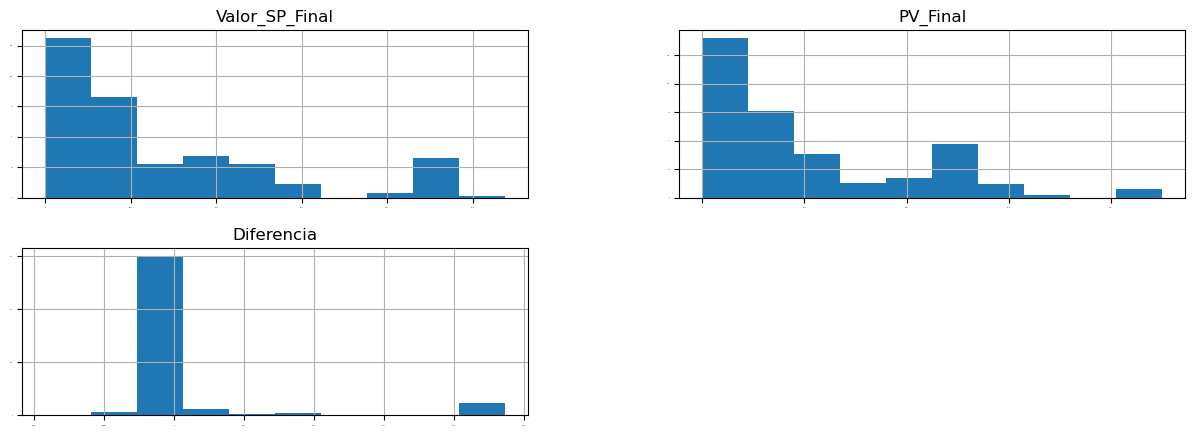

In [24]:
MpTodosSinSolicitud.hist( sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,5))


Histograma por Materia Prima

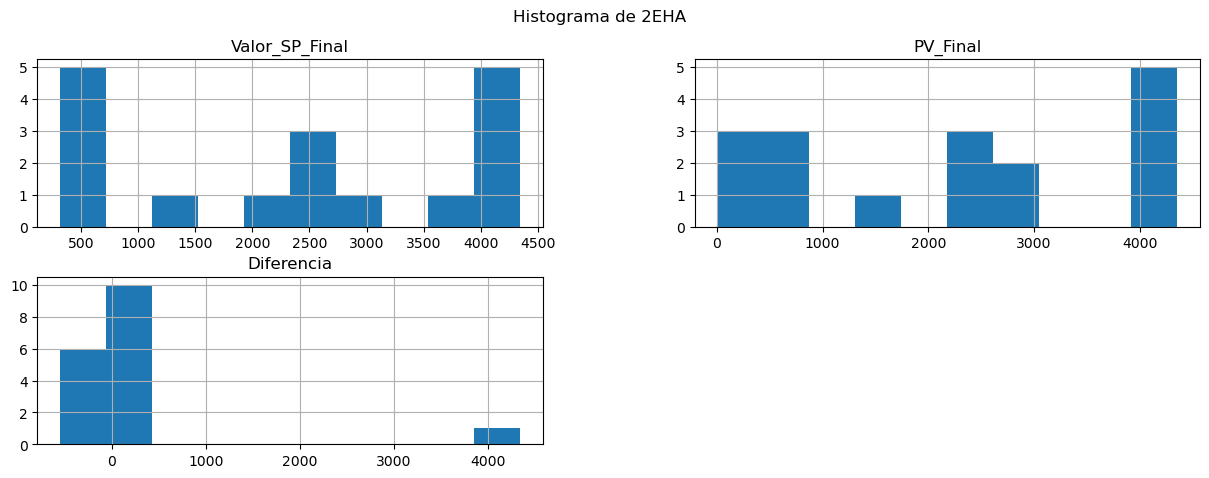

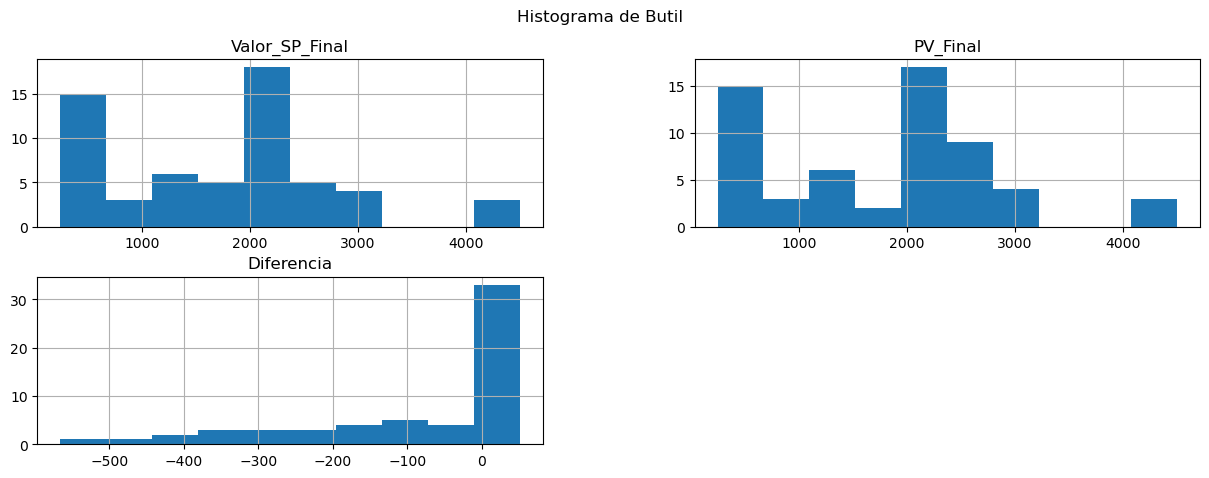

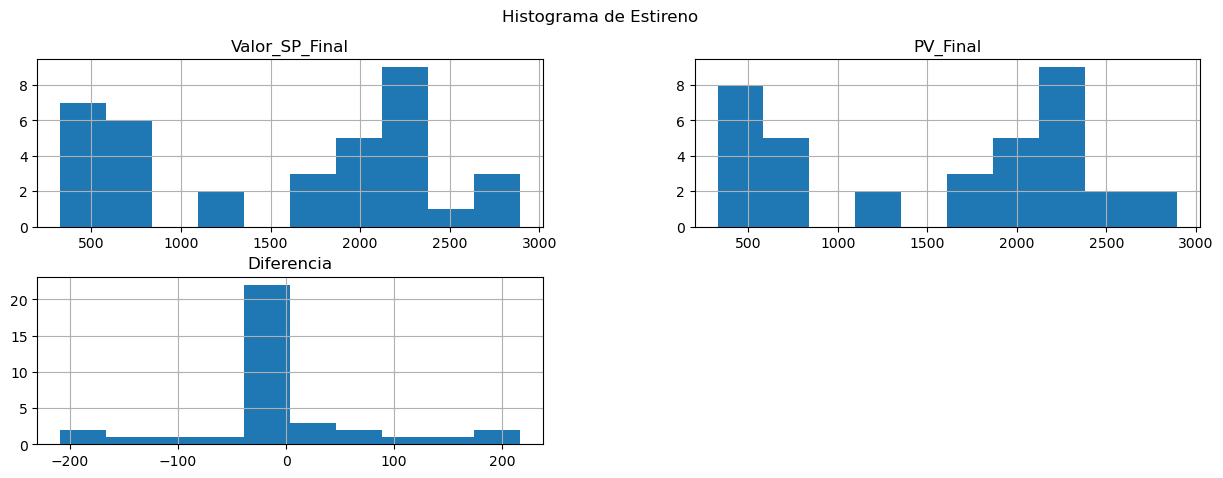

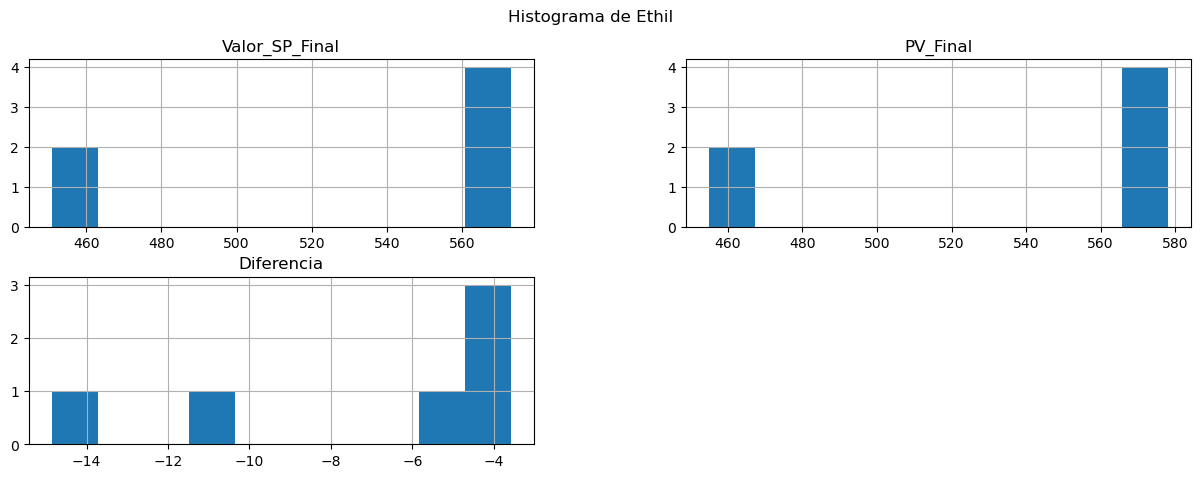

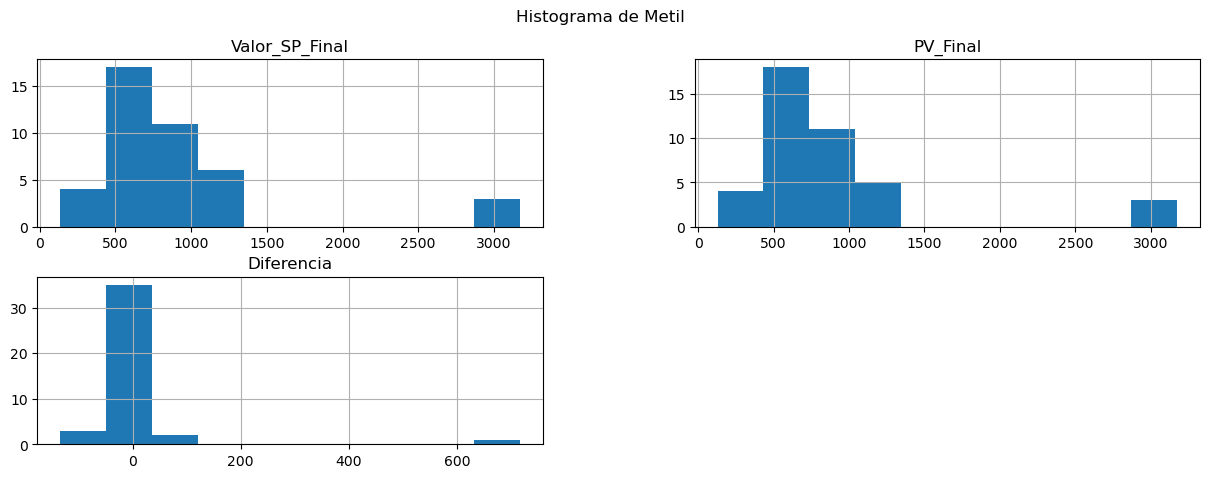

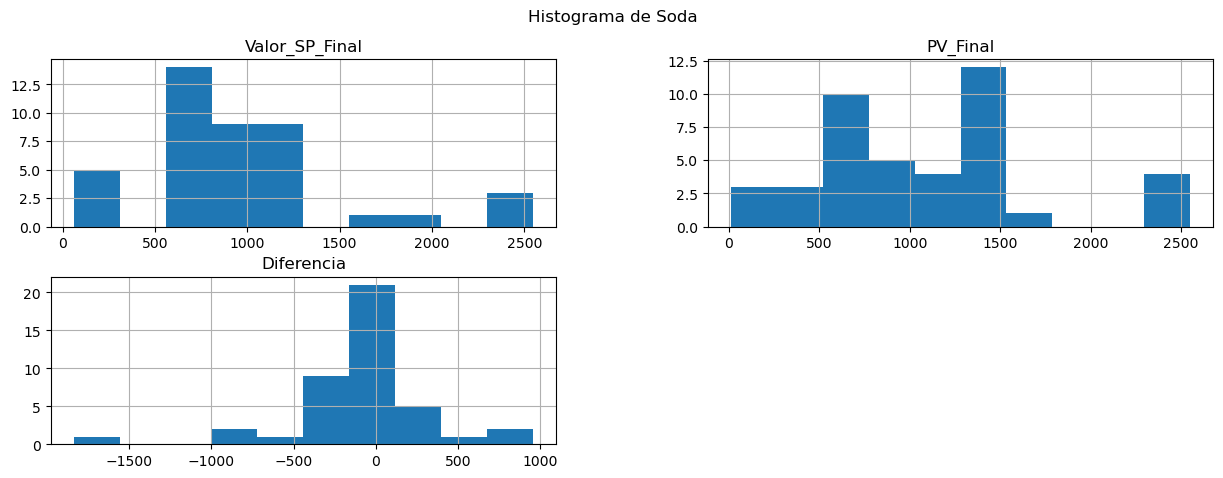

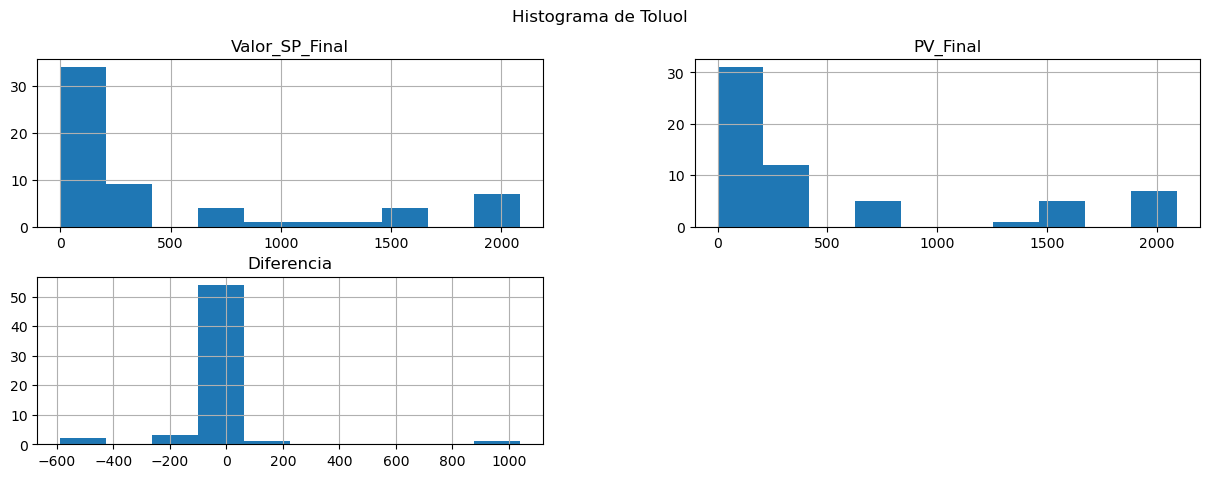

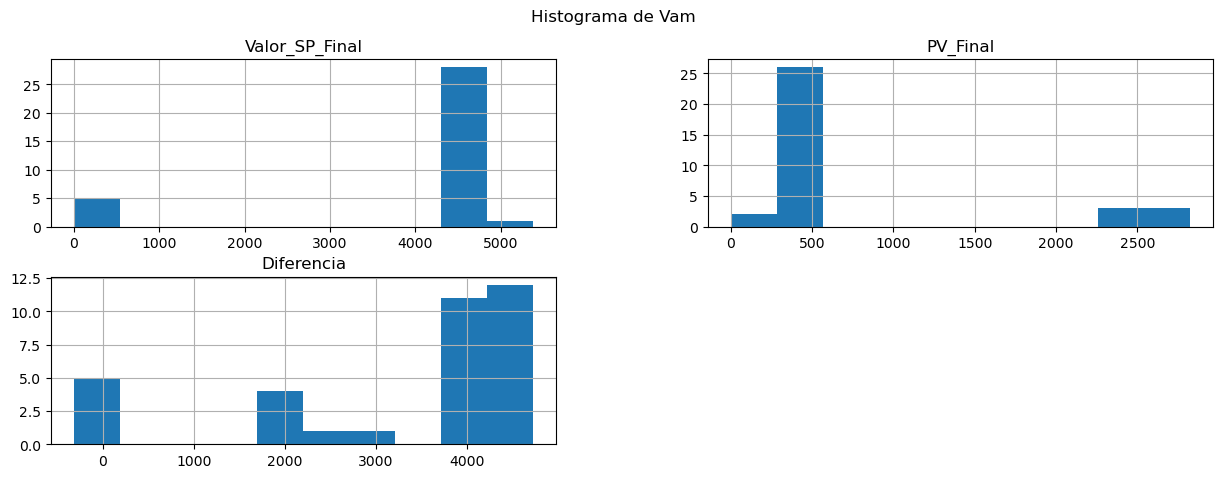

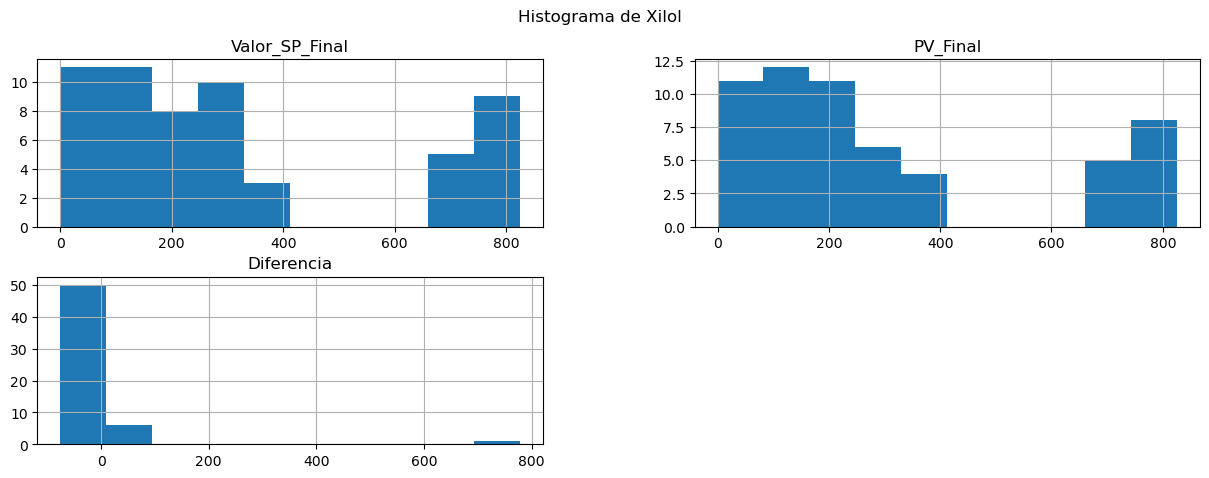

In [25]:
# MpTodosSinSolicitud.groupby("MateriaPrima").hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,5))

for nombre, grupo in MpTodosSinSolicitud.groupby("MateriaPrima"):
    grupo.hist(figsize=(15,5))
    pyplot.suptitle(f'Histograma de {nombre}')  # Título usando el nombre de la MateriaPrima
    pyplot.show()    

Analisis de densidad de Global

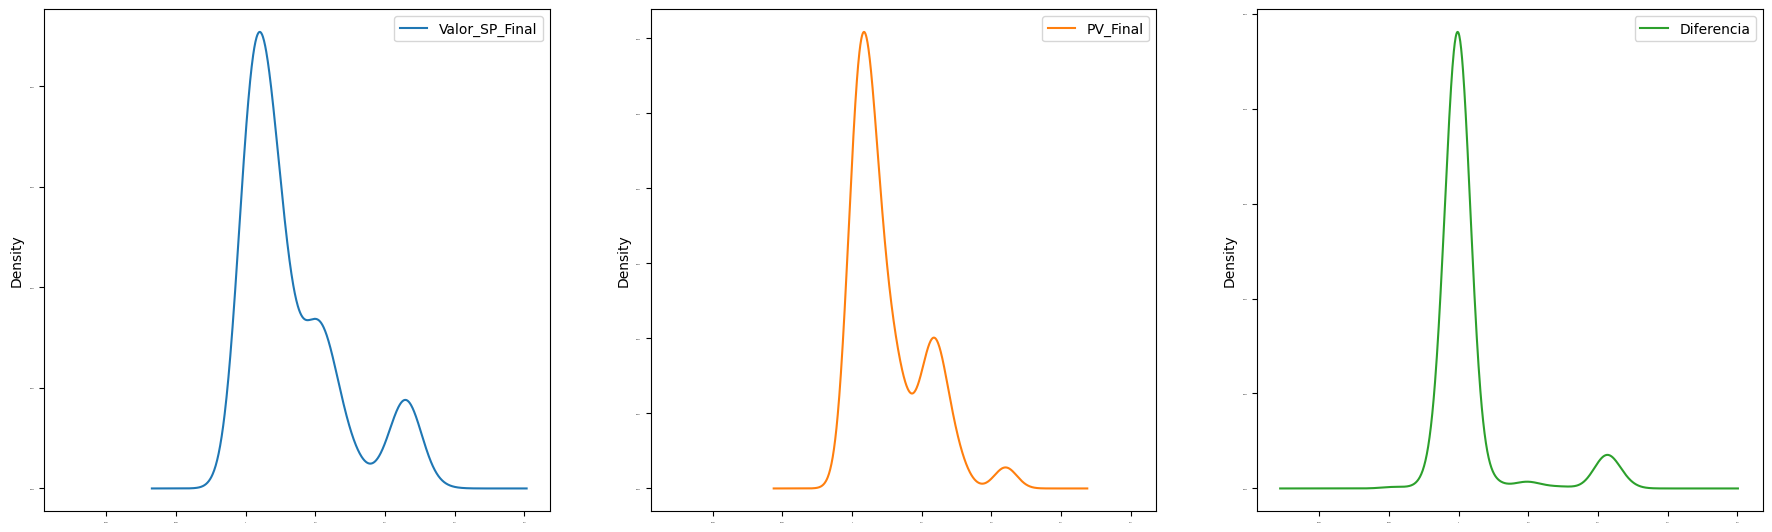

In [26]:
MpTodosSinSolicitud.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(30,30))
pyplot.show()

Analisis de densidad por Materia Prima

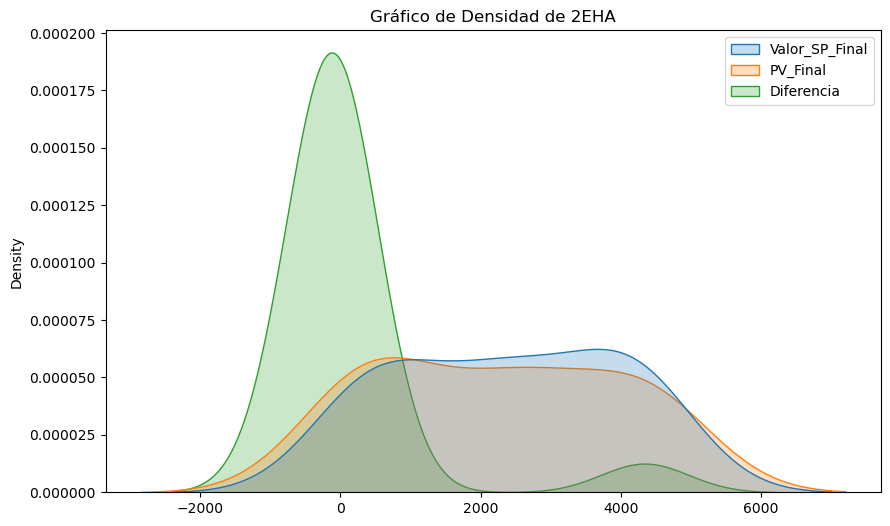

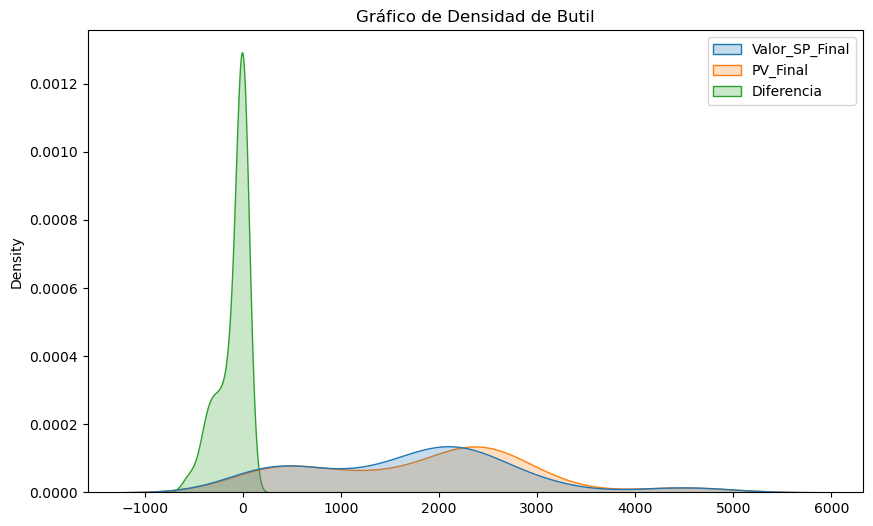

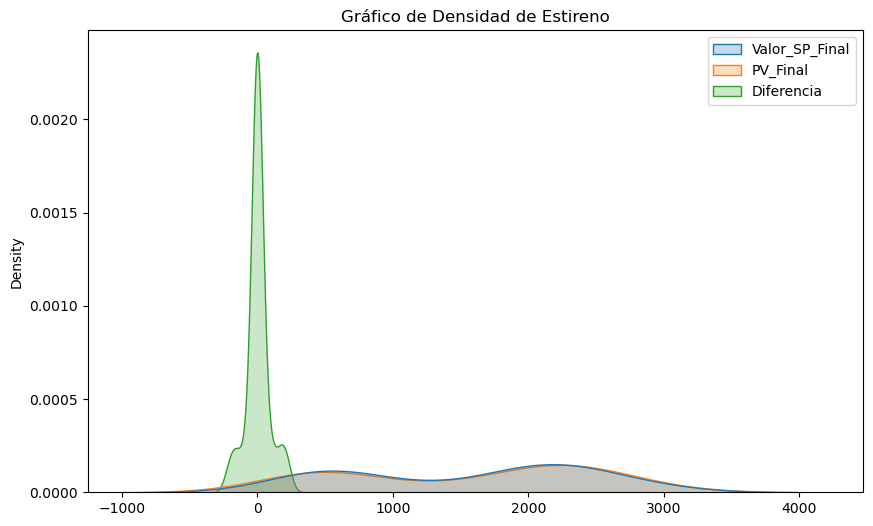

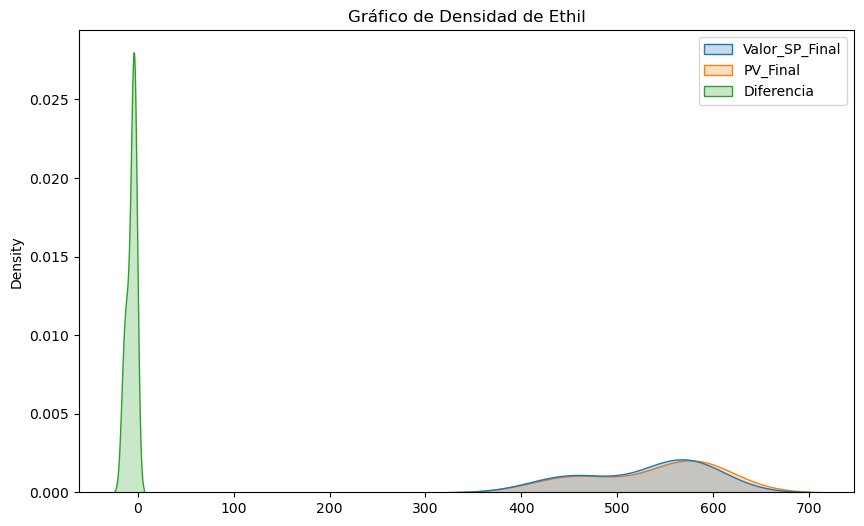

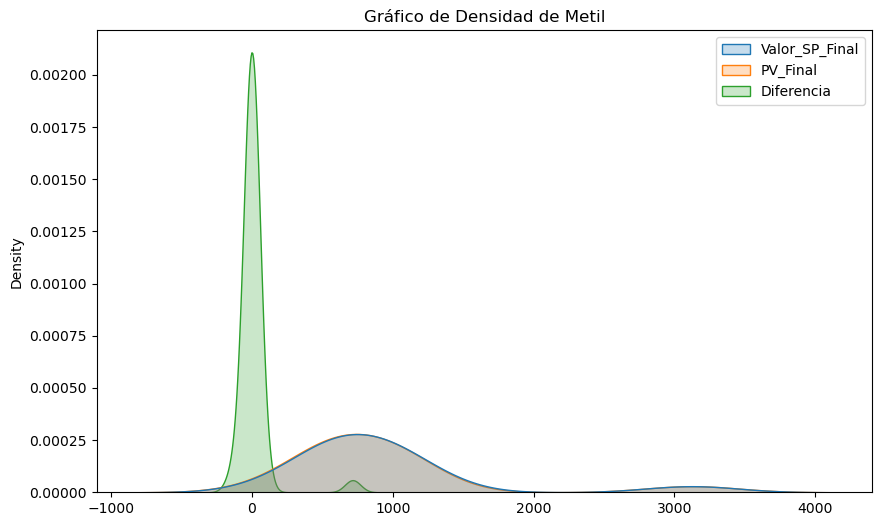

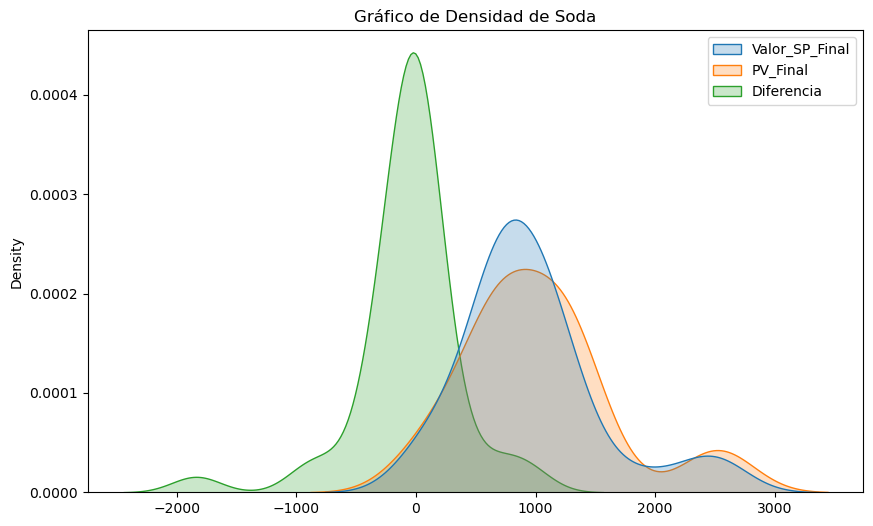

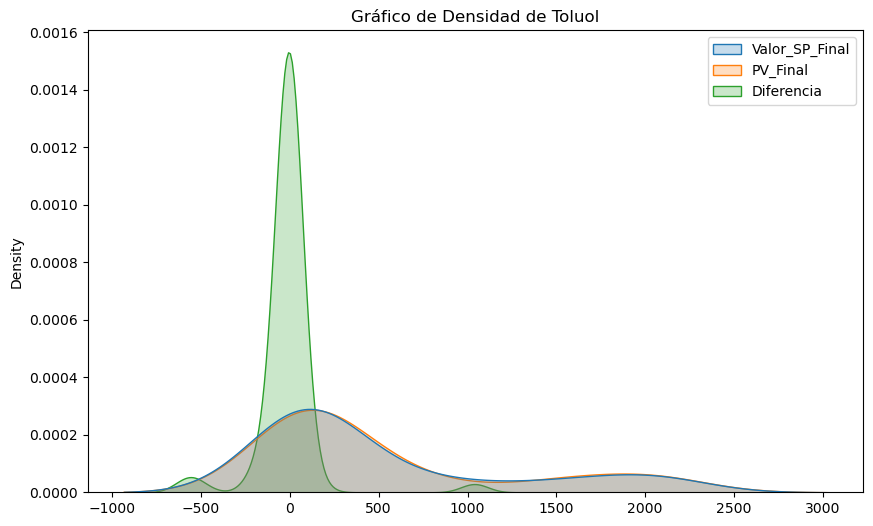

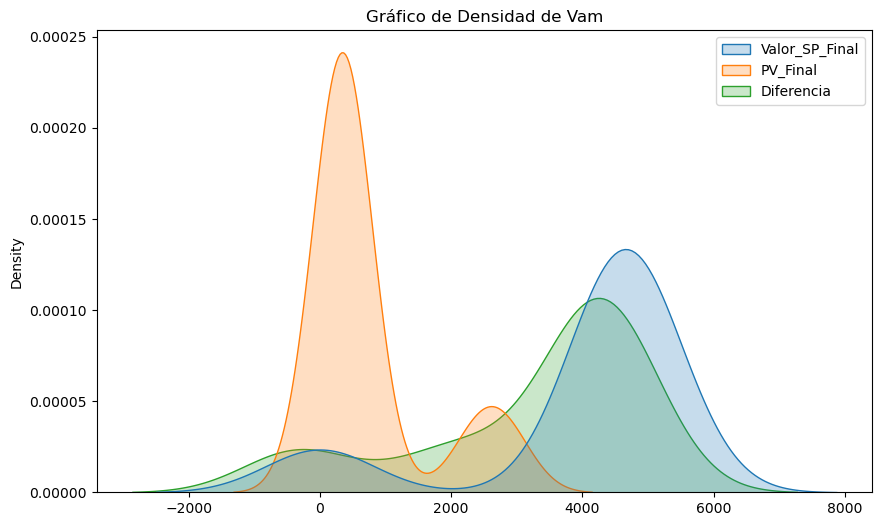

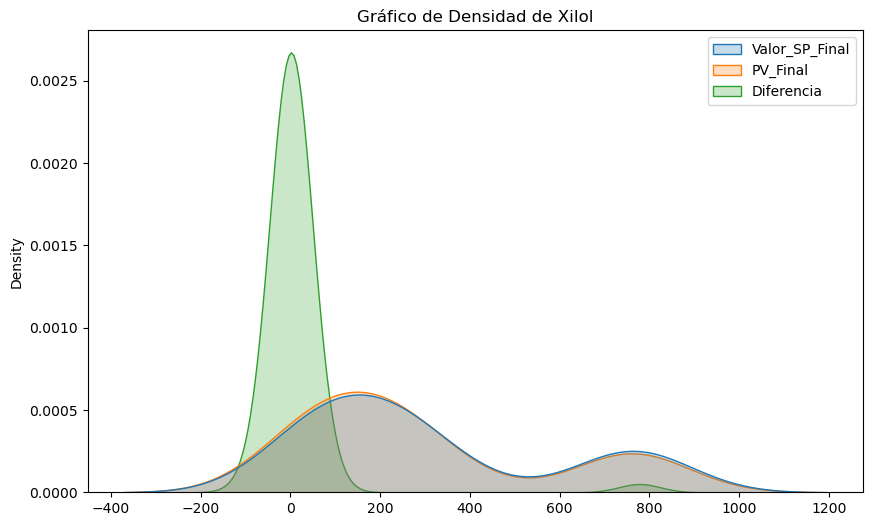

In [27]:
for nombre, grupo in MpTodosSinSolicitud.groupby("MateriaPrima"):
    pyplot.figure(figsize=(10, 6))
    sns.kdeplot(data=grupo, fill=True)
    pyplot.title(f'Gráfico de Densidad de {nombre}')
    pyplot.show()

# MpTodosSinSolicitud.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(30,30))
# pyplot.show()

Análisis de la serie de tiempo


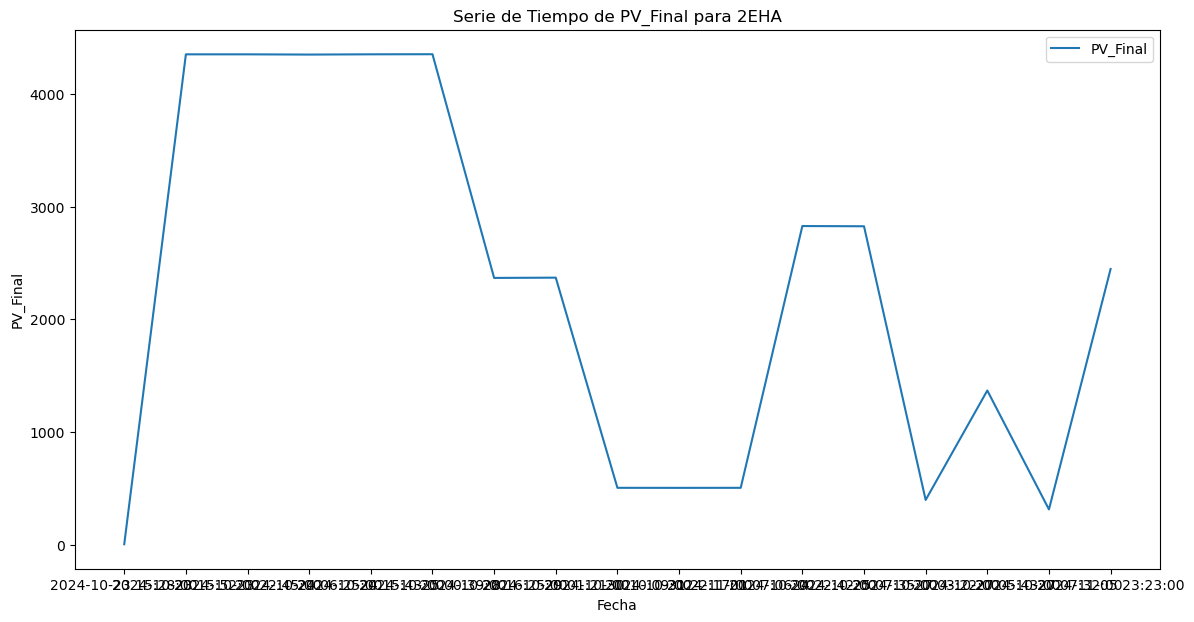

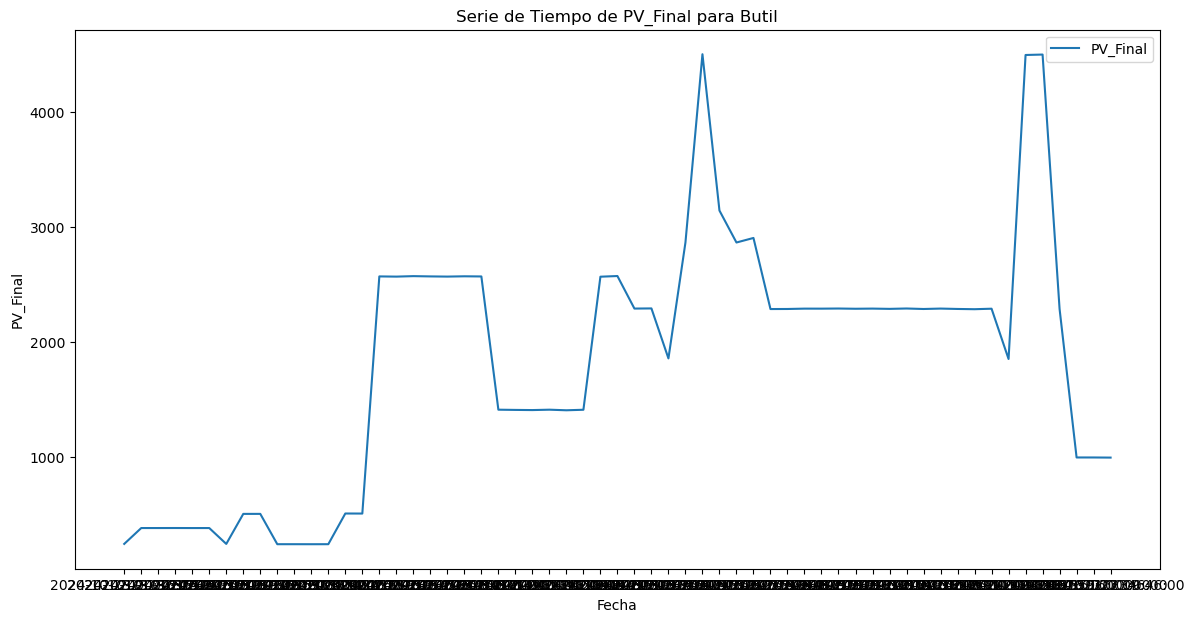

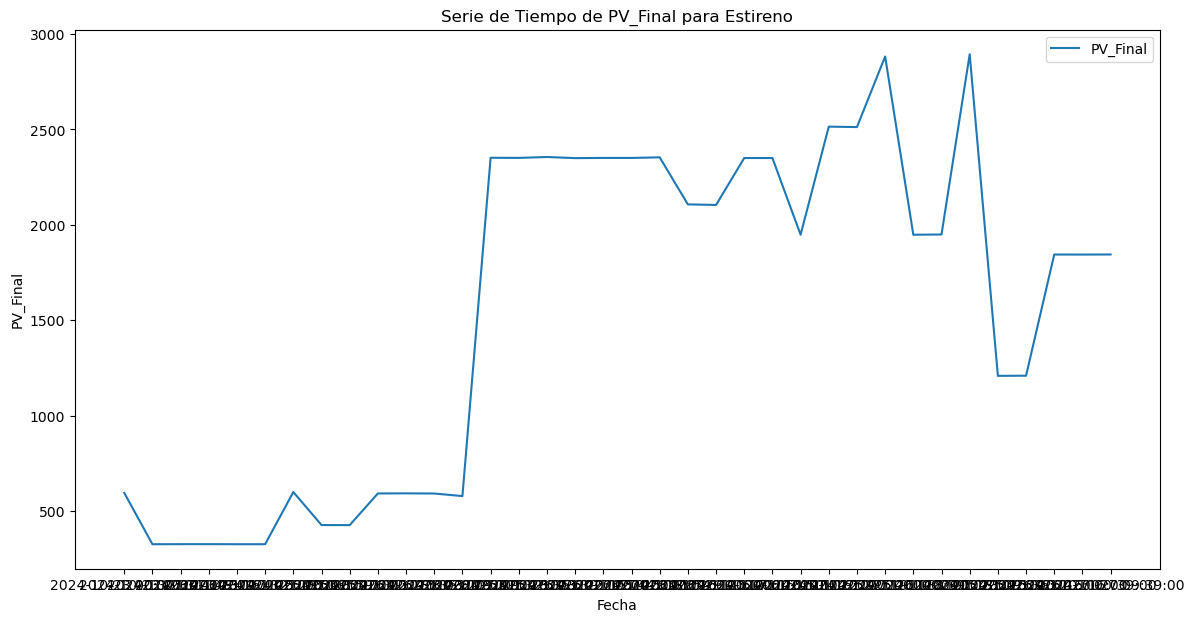

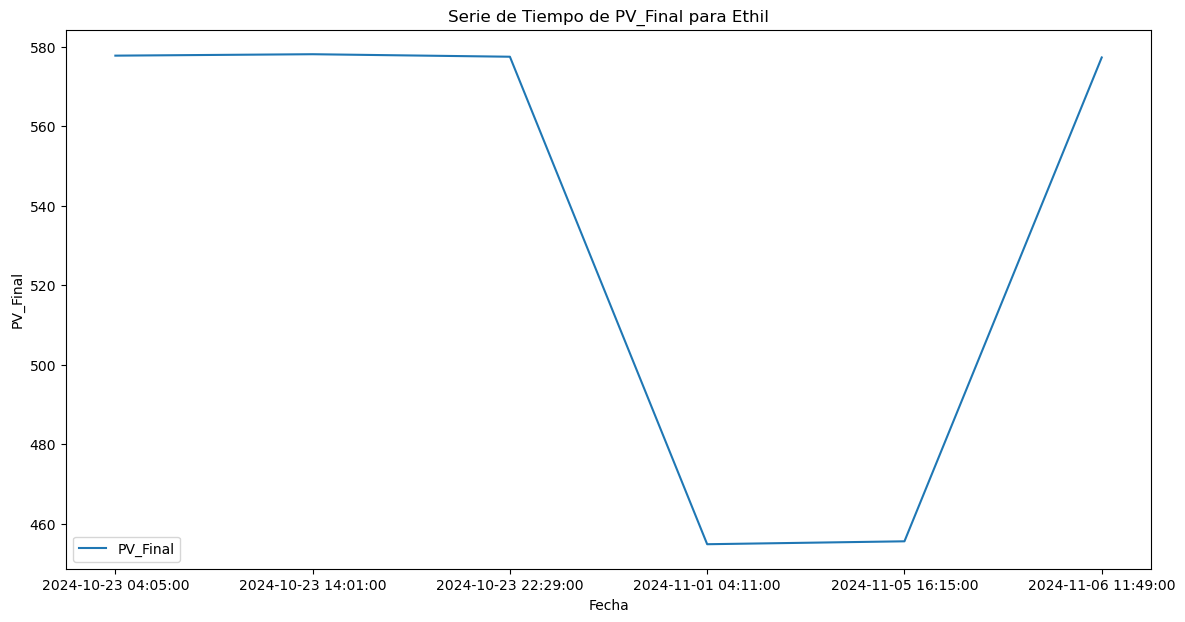

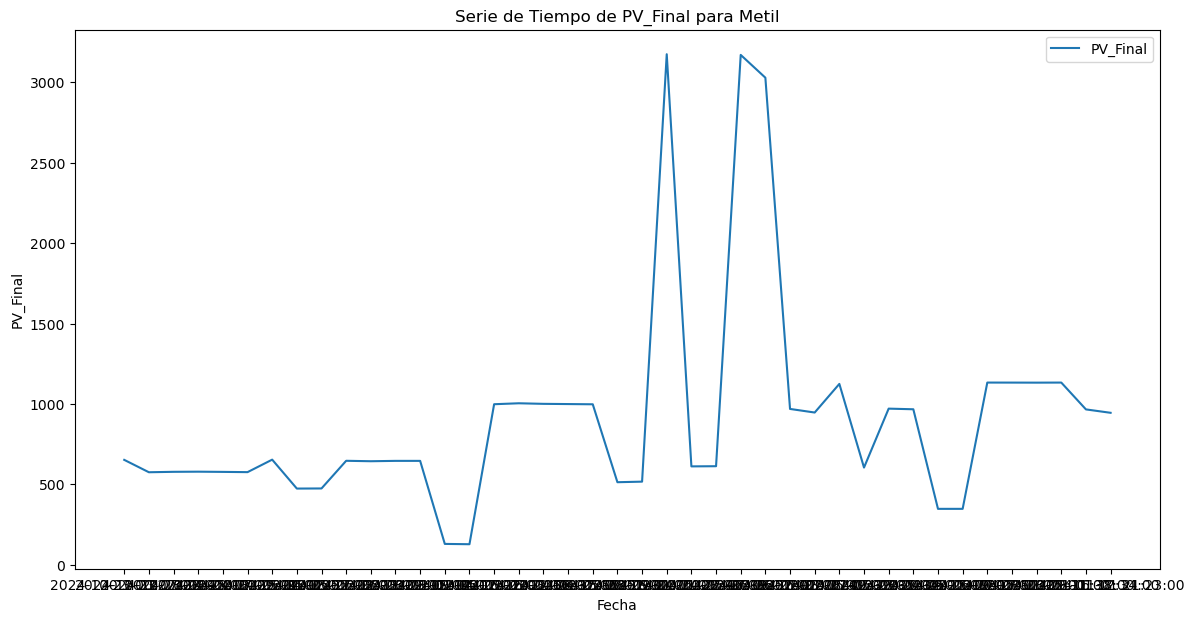

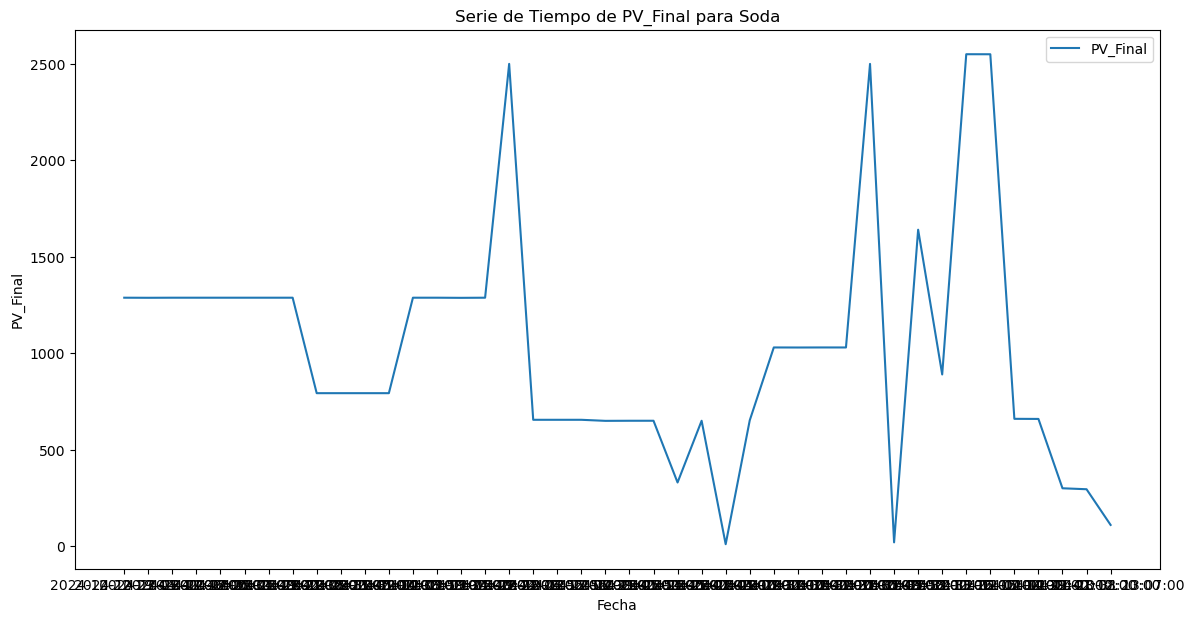

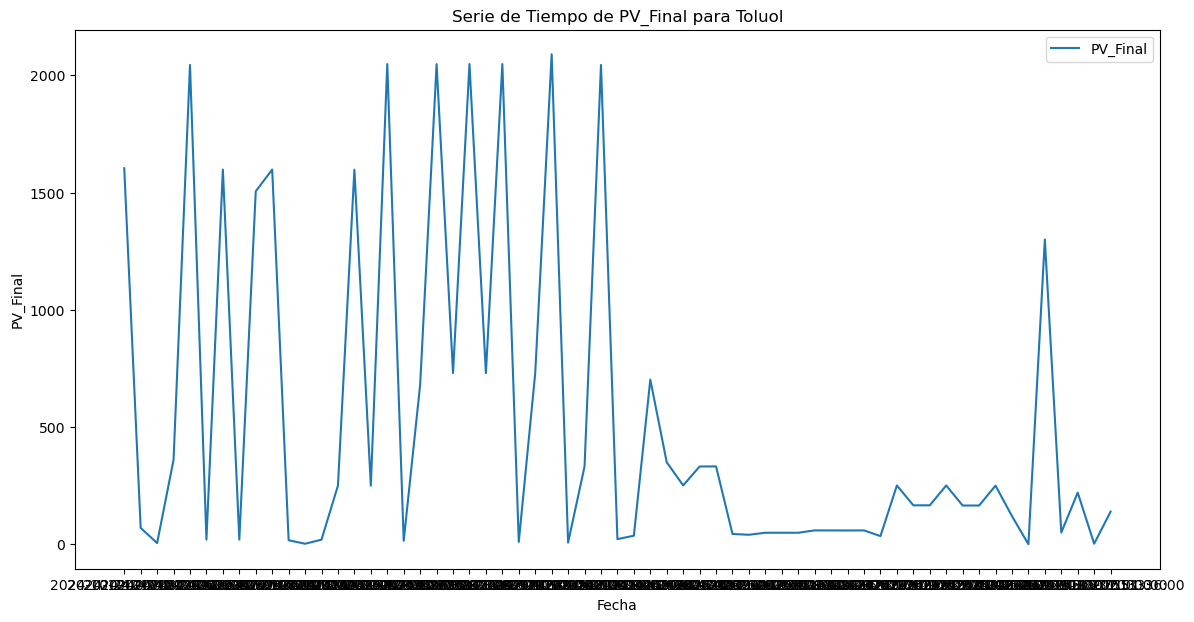

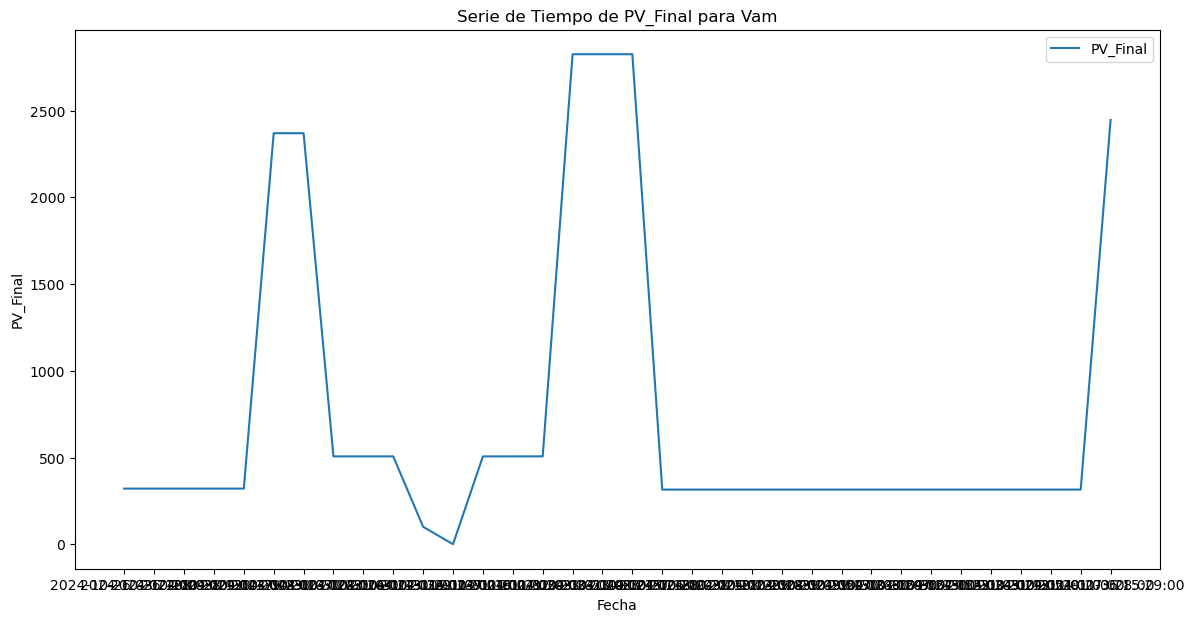

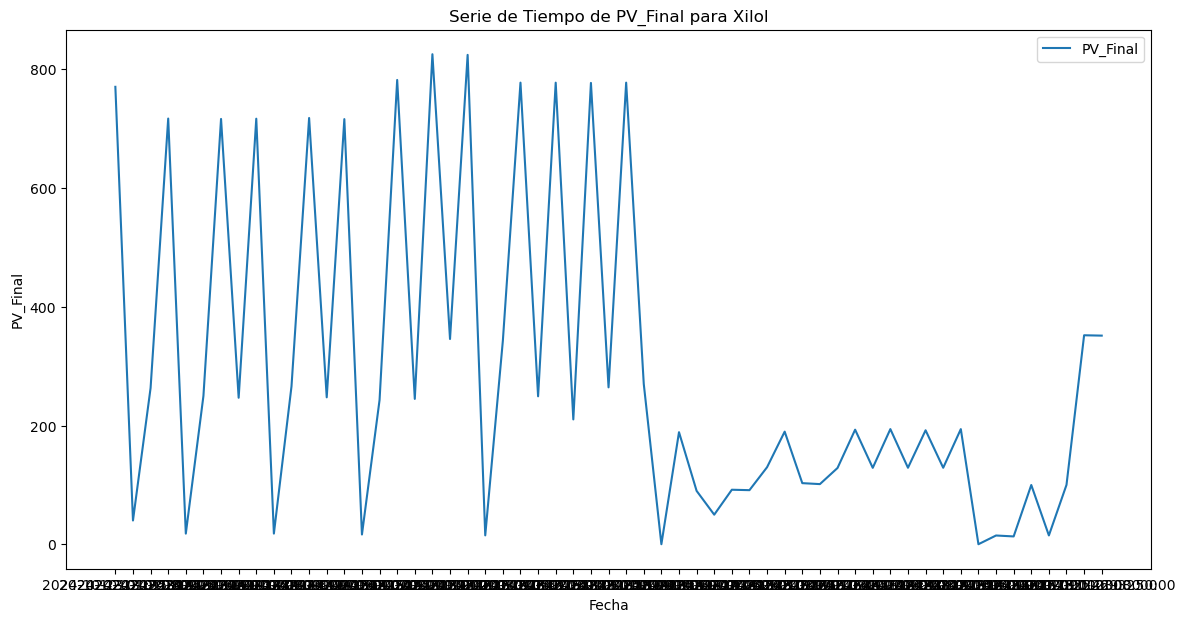

In [ ]:
# MpTodosSinSolicitud.groupby("MateriaPrima")

# MpTodosSinSolicitud.to_csv("C:/Temp/MpTodos.csv")
# print(MpTodosSinSolicitud)

for nombre, grupo in MpTodosSinSolicitud.groupby("MateriaPrima"):    
    pyplot.figure(figsize=(14, 7))
    pyplot.plot(grupo['PV_Final'], label='PV_Final')
    pyplot.xlabel('Fecha')
    pyplot.ylabel('PV_Final')
    pyplot.title(f'Serie de Tiempo de PV_Final para {nombre}')
    pyplot.xticks(rotation=45)  # Rotar las etiquetas del eje x
    pyplot.grid(True) 
    pyplot.legend()
    pyplot.show()



Se identifica posibles valores atipicos los cuales se deben revisar para identificar si se descartan

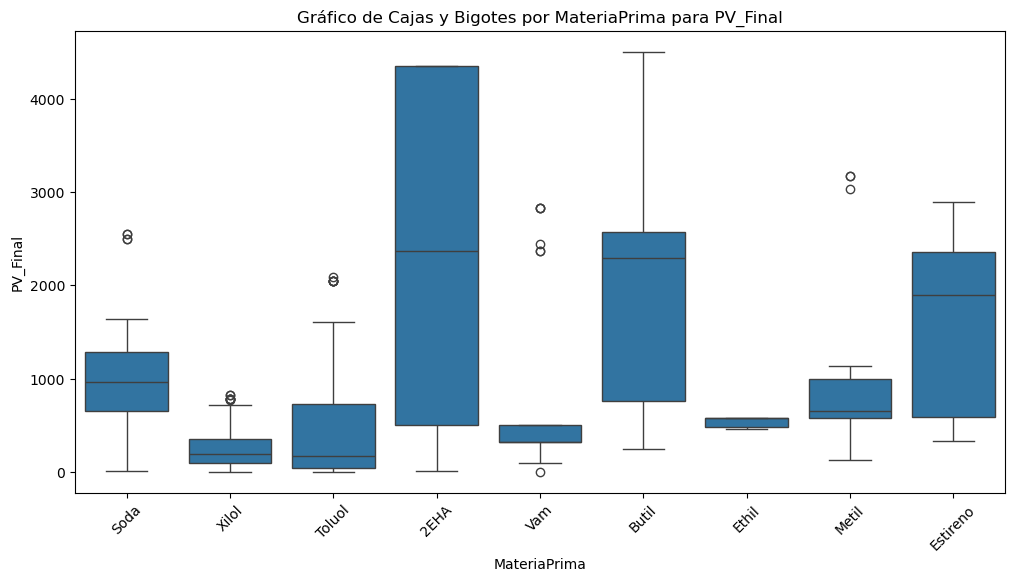

In [29]:
pyplot.figure(figsize=(12, 6))
sns.boxplot(x='MateriaPrima', y='PV_Final', data=MpTodosSinSolicitud)
pyplot.title('Gráfico de Cajas y Bigotes por MateriaPrima para PV_Final')
pyplot.xlabel('MateriaPrima')
pyplot.ylabel('PV_Final')
pyplot.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
pyplot.show()


## 5) Modelado Arima

Exploración basica de Arima


--- Modelo para Soda ---


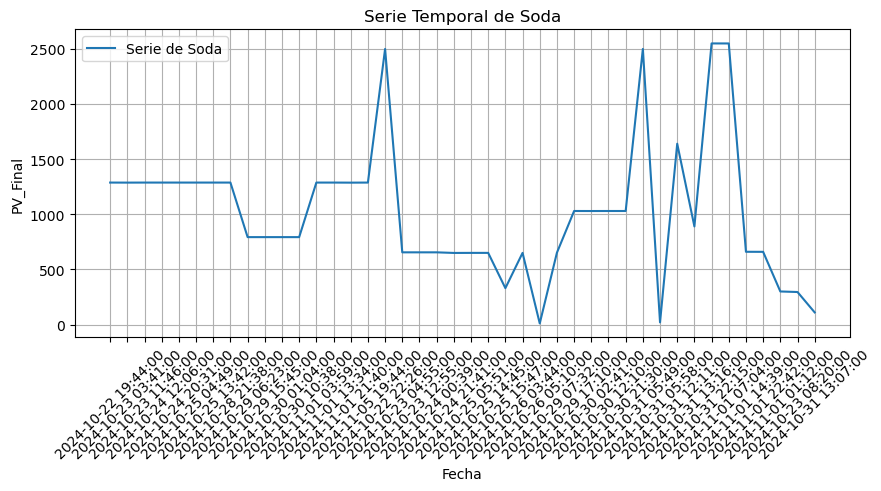

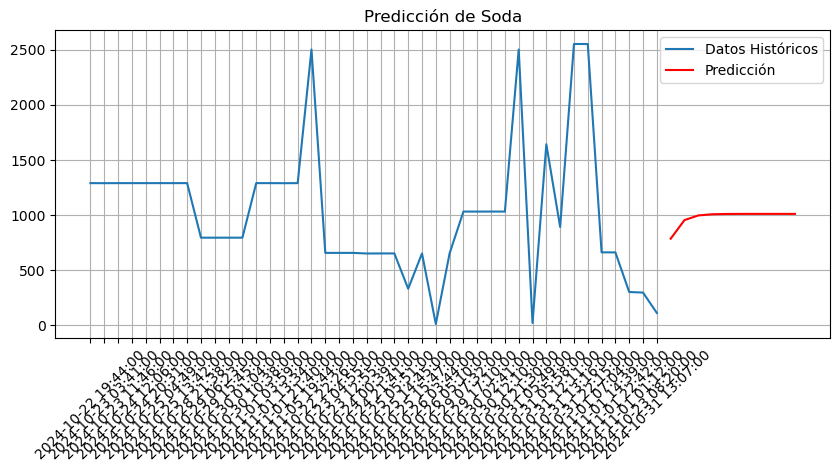


--- Modelo para Xilol ---


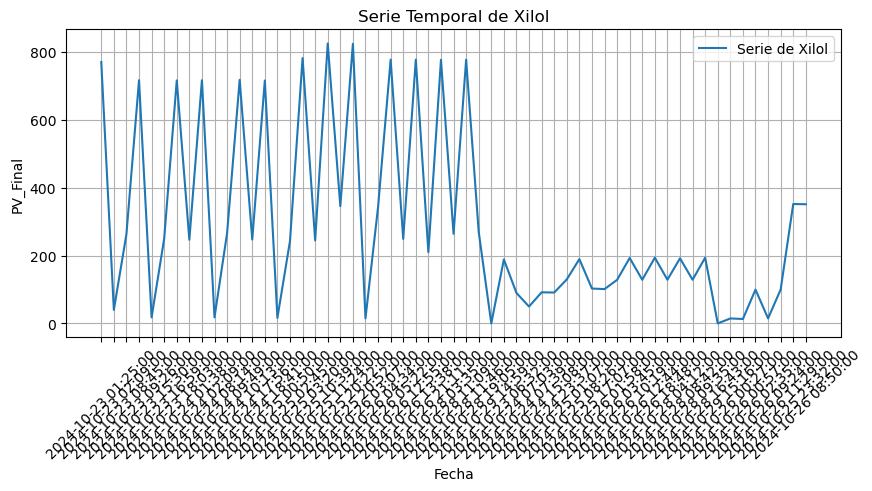

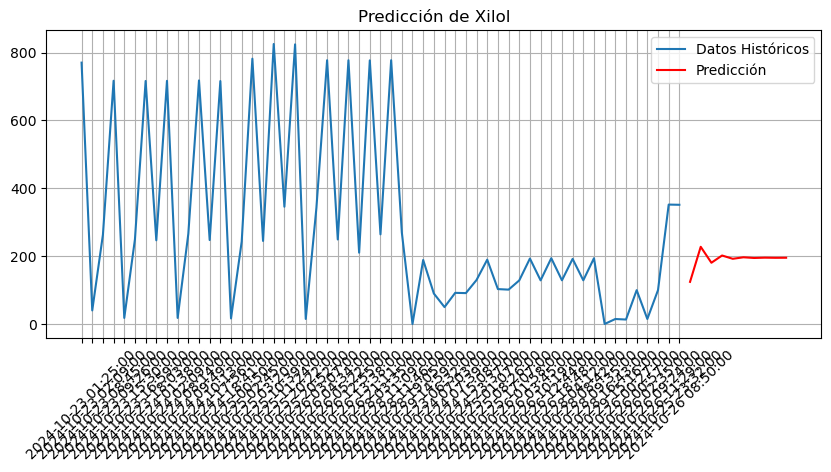


--- Modelo para Toluol ---


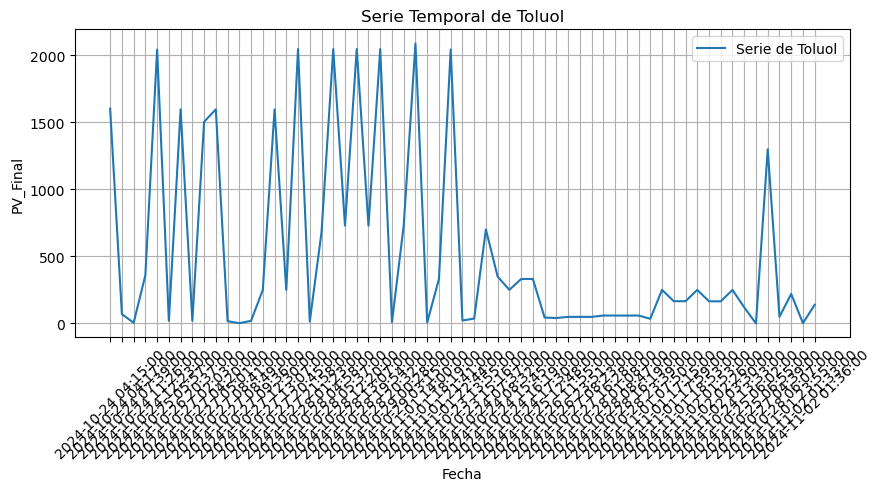

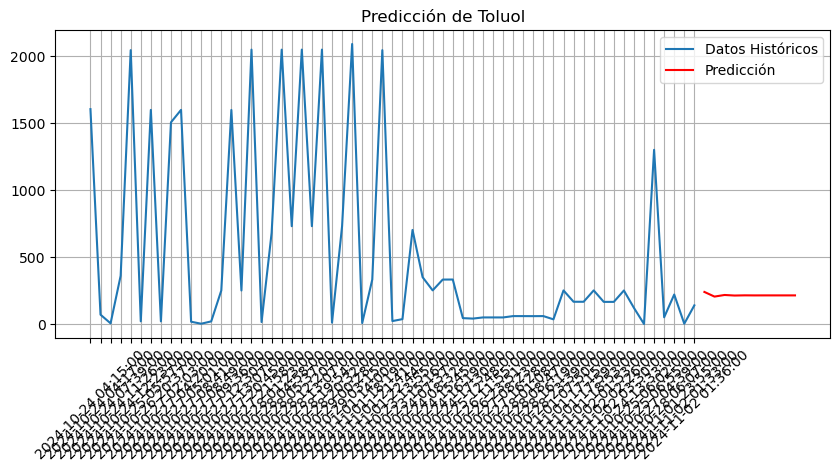


--- Modelo para 2EHA ---


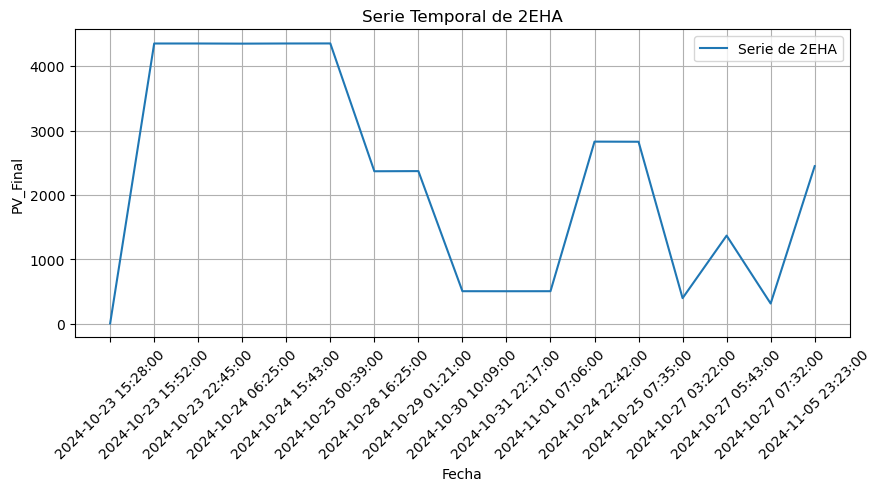

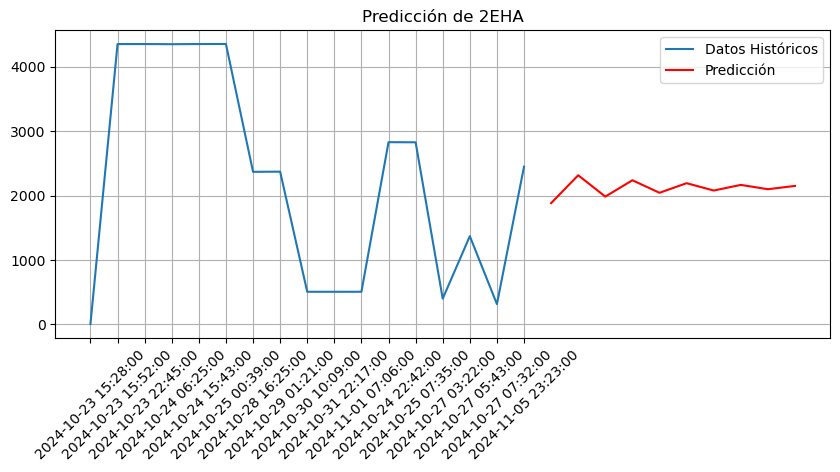


--- Modelo para Vam ---


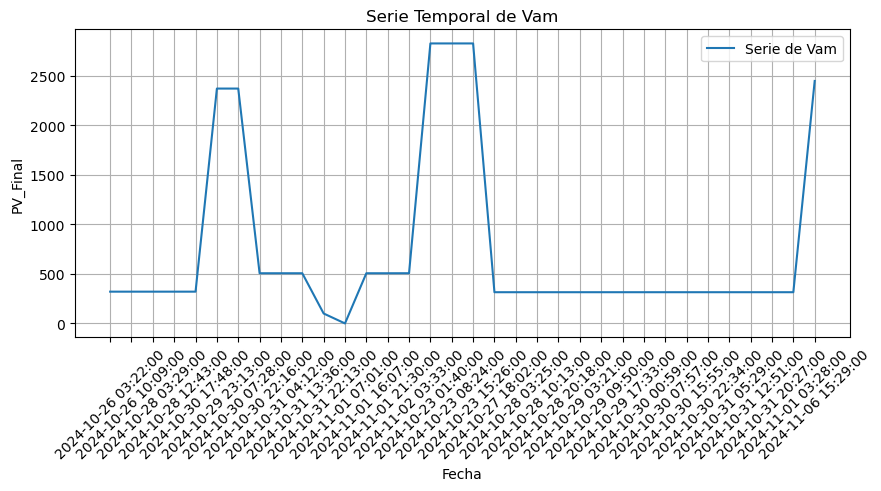

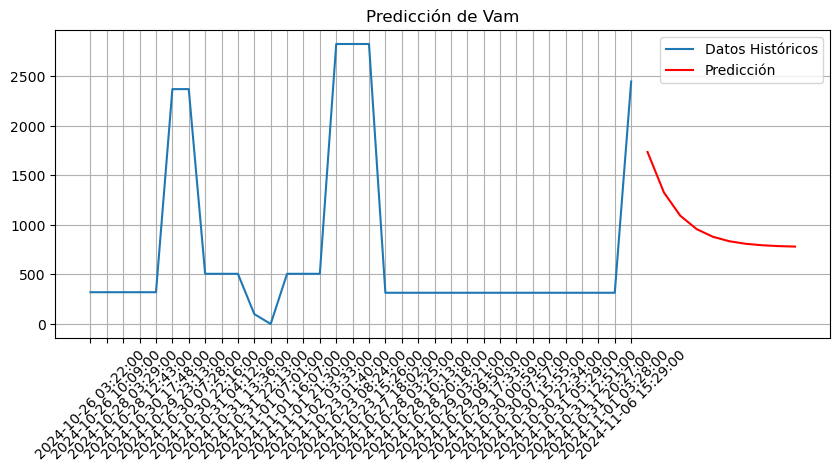


--- Modelo para Butil ---


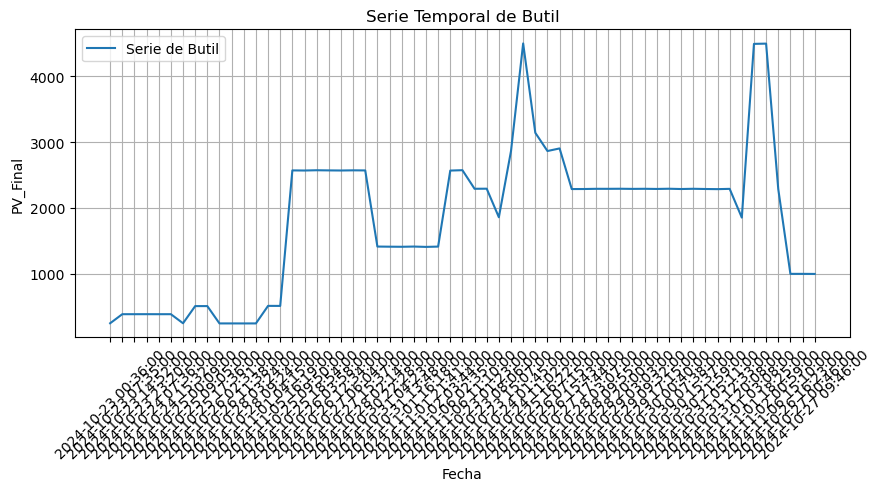

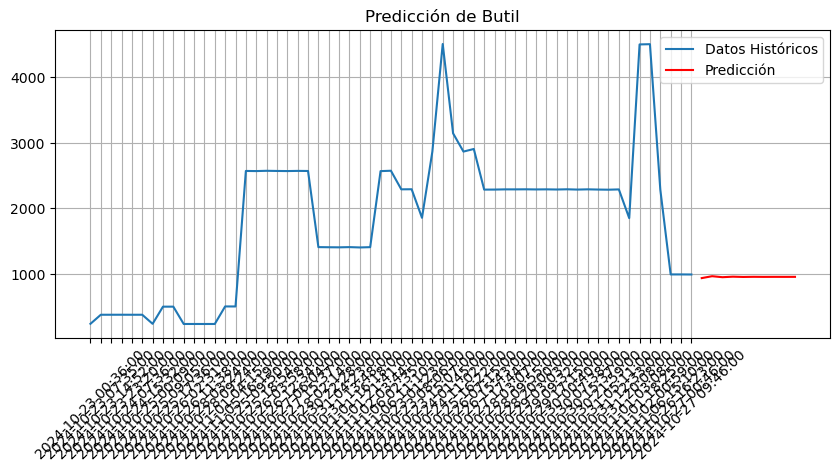


--- Modelo para Ethil ---


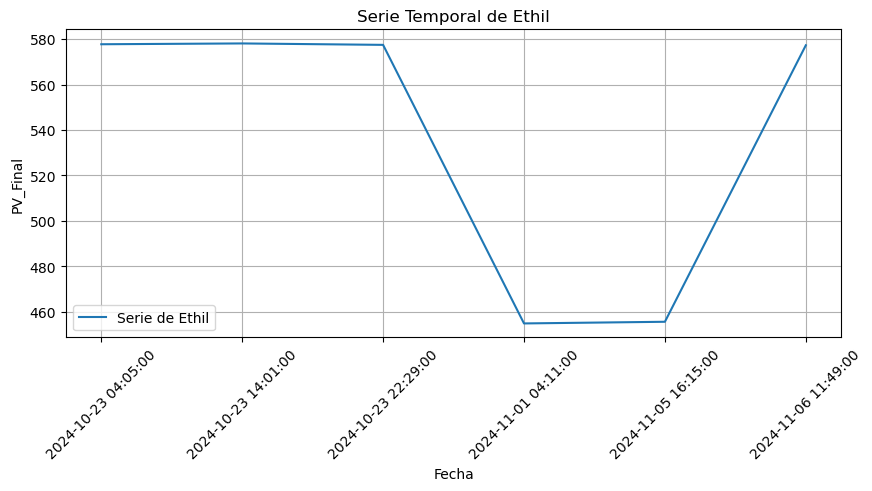

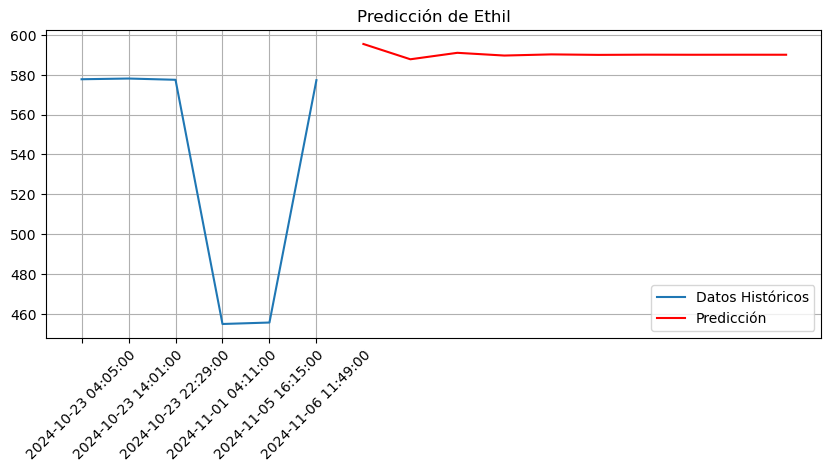


--- Modelo para Metil ---


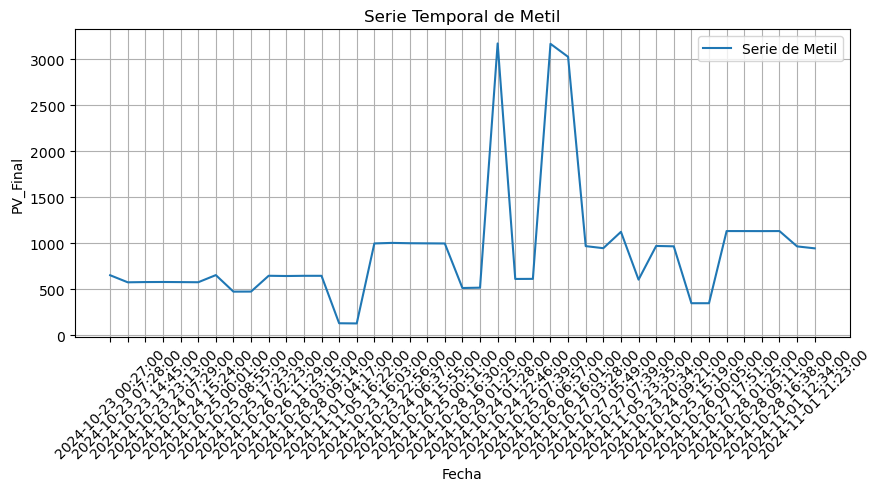

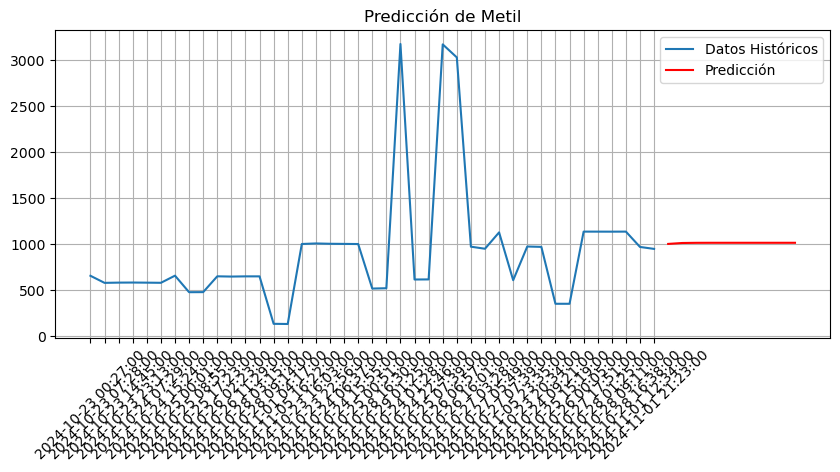


--- Modelo para Estireno ---


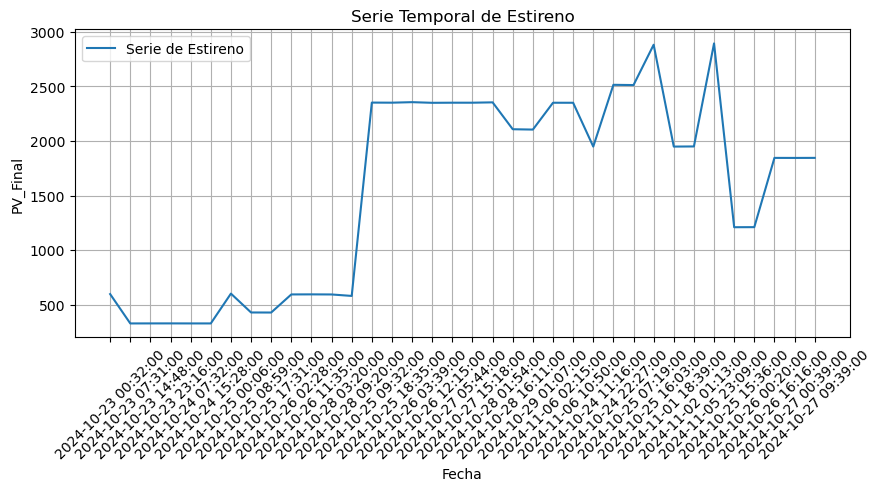

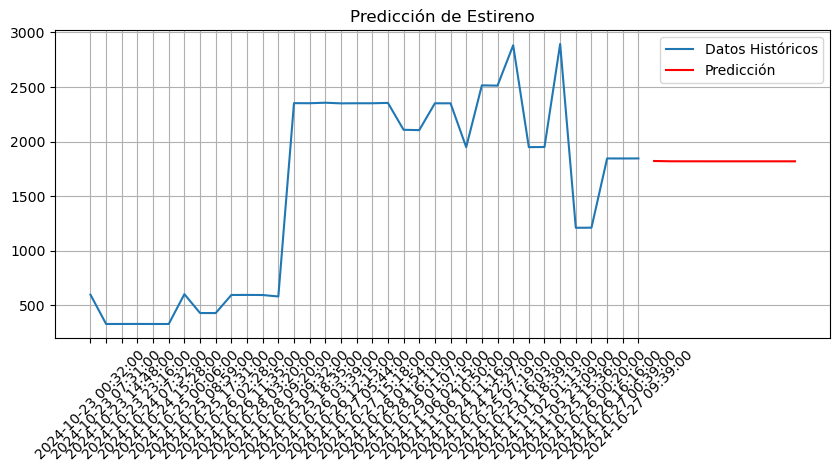

In [44]:
materias_primas = MpTodos['MateriaPrima'].unique()
modelos = {}
predicciones = {}

for materia in materias_primas:
    print(f'\n--- Modelo para {materia} ---')
    
    # Filtrar los datos por cada MateriaPrima
    data_materia = MpTodos[MpTodos['MateriaPrima'] == materia].copy()
    # data_materia.set_index('Time_Stamp', inplace=True)
    
    # Seleccionar la columna a predecir (por ejemplo, PV_Final)
    serie = data_materia['PV_Final']
    
    # Visualización (opcional, pero ayuda a ver la tendencia de cada serie)
    pyplot.figure(figsize=(10, 4))
    pyplot.plot(serie, label=f'Serie de {materia}')
    pyplot.title(f'Serie Temporal de {materia}')
    pyplot.xlabel('Fecha')
    pyplot.ylabel('PV_Final')
    pyplot.xticks(rotation=45)  # Rotar las etiquetas del eje x
    pyplot.grid(True) 
    pyplot.legend()
    pyplot.show()

    # Diferenciar la serie si no es estacionaria (esto depende de tu análisis)
    # Ajusta aquí (p, d, q) según corresponda a tus datos
    modelo = ARIMA(serie, order=(1, 1, 1))  # Ajustar los valores de p, d, q
    resultado = modelo.fit()
    modelos[materia] = resultado  # Guardar el modelo ajustado

    # Predicción
    pred = resultado.forecast(steps=10)  # Ajusta el número de pasos en el futuro
    predicciones[materia] = pred  # Guardar predicción

    # Gráfico de Predicción
    pyplot.figure(figsize=(10, 4))
    pyplot.plot(serie, label='Datos Históricos')
    pyplot.plot(pred, label='Predicción', color='red')
    pyplot.title(f'Predicción de {materia}')
    pyplot.xticks(rotation=45)  # Rotar las etiquetas del eje x
    pyplot.grid(True) 
    pyplot.legend()
    pyplot.show()


In [ ]:
predicciones

{'Soda': 42     783.666605
 43     952.481773
 44     994.785449
 45    1005.386399
 46    1008.042908
 47    1008.708608
 48    1008.875426
 49    1008.917230
 50    1008.927705
 51    1008.930330
 Name: predicted_mean, dtype: float64,
 'Xilol': 57    124.225279
 58    227.561536
 59    180.558588
 60    201.938084
 61    192.213527
 62    196.636784
 63    194.624846
 64    195.539985
 65    195.123730
 66    195.313065
 Name: predicted_mean, dtype: float64,
 'Toluol': 61    239.175939
 62    204.562856
 63    216.533665
 64    212.393605
 65    213.825429
 66    213.330238
 67    213.501498
 68    213.442268
 69    213.462753
 70    213.455668
 Name: predicted_mean, dtype: float64,
 '2EHA': 17    1881.692919
 18    2314.362688
 19    1983.057746
 20    2236.745368
 21    2042.491068
 22    2191.235941
 23    2077.338657
 24    2164.552361
 25    2097.770873
 26    2148.906955
 Name: predicted_mean, dtype: float64,
 'Vam': 34    1735.804176
 35    1327.105558
 36    1092.155530
 37  

1. Dividir los Datos en Entrenamiento y Prueba

    Se divide cada serie temporal en una parte de entrenamiento y una de prueba. Normalmente, en series temporales se utiliza una división basada en el tiempo (por ejemplo, el último 20% de los datos para prueba).

2. Definir una Función para Calcular el Error

    Utiliza métricas como el Error Cuadrático Medio (MSE) o el Error Absoluto Medio (MAE) para evaluar el rendimiento del modelo.

3. Realizar Búsqueda de Parámetros para p, d, q

    Prueba de diferentes combinaciones de p, d, y q para cada serie temporal, ajustando el modelo y calculando el error en el conjunto de prueba.

In [ ]:


warnings.filterwarnings("ignore")

# Cargar los datos
# data = pd.read_csv('bombeos.csv')
# data['Time_Stamp'] = pd.to_datetime(data['Time_Stamp'])

# Seleccionar las materias primas únicas
materias_primas = MpTodos['MateriaPrima'].unique()

# Parámetros iniciales para iterar
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Diccionario para almacenar los mejores parámetros y errores
mejores_parametros = {}

# Función para evaluar el modelo ARIMA
def evaluar_arima(train, test, p, d, q):
    modelo = ARIMA(train, order=(p, d, q))
    resultado = modelo.fit()
    prediccion = resultado.forecast(steps=len(test))
    error = mean_squared_error(test, prediccion)
    return error

# Iterar por cada materia prima
for materia in materias_primas:
    print(f'\n--- Evaluando modelo para {materia} ---')
    
    # Filtrar los datos por materia prima y configurar el índice
    data_materia = MpTodos[MpTodos['MateriaPrima'] == materia].copy()
    # data_materia.set_index('Time_Stamp', inplace=True)
    serie = data_materia['PV_Final']
    
    # Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
    train_size = int(len(serie) * 0.8)
    train, test = serie[:train_size], serie[train_size:]
    
    # Variables para almacenar el mejor modelo
    mejor_score, mejor_param = float("inf"), None
    
    # Iterar sobre las combinaciones de p, d, q
    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            error = evaluar_arima(train, test, p, d, q)
            if error < mejor_score:
                mejor_score, mejor_param = error, (p, d, q)
            print(f'ARIMA{(p,d,q)} - MSE: {error:.4f}')
        except:
            continue
    
    print(f'\nMejor modelo para {materia}: ARIMA{mejor_param} con MSE: {mejor_score:.4f}')
    mejores_parametros[materia] = {'parametros': mejor_param, 'mse': mejor_score}

# Resultados
print("\n--- Mejor configuración de parámetros por Materia Prima ---")
for materia, resultado in mejores_parametros.items():
    print(f"{materia}: Parámetros {resultado['parametros']} con MSE {resultado['mse']:.4f}")



--- Evaluando modelo para Soda ---
ARIMA(0, 0, 0) - MSE: 802822.4667
ARIMA(0, 0, 1) - MSE: 819414.9953
ARIMA(0, 0, 2) - MSE: 764619.3538
ARIMA(0, 1, 0) - MSE: 1907959.1891
ARIMA(0, 1, 1) - MSE: 818362.3884
ARIMA(0, 1, 2) - MSE: 833249.5509
ARIMA(1, 0, 0) - MSE: 823346.1300
ARIMA(1, 0, 1) - MSE: 814823.7148
ARIMA(1, 0, 2) - MSE: 778755.7594
ARIMA(1, 1, 0) - MSE: 771100.5108
ARIMA(1, 1, 1) - MSE: 837793.9992
ARIMA(1, 1, 2) - MSE: 823154.8377
ARIMA(2, 0, 0) - MSE: 758772.2034
ARIMA(2, 0, 1) - MSE: 755982.9460
ARIMA(2, 0, 2) - MSE: 919663.4627
ARIMA(2, 1, 0) - MSE: 770218.1539
ARIMA(2, 1, 1) - MSE: 758859.2521
ARIMA(2, 1, 2) - MSE: 751973.7309

Mejor modelo para Soda: ARIMA(2, 1, 2) con MSE: 751973.7309

--- Evaluando modelo para Xilol ---
ARIMA(0, 0, 0) - MSE: 55251.4468
ARIMA(0, 0, 1) - MSE: 55666.6776
ARIMA(0, 0, 2) - MSE: 52661.6331
ARIMA(0, 1, 0) - MSE: 17541.5962
ARIMA(0, 1, 1) - MSE: 15830.4329
ARIMA(0, 1, 2) - MSE: 14399.0215
ARIMA(1, 0, 0) - MSE: 55754.2589
ARIMA(1, 0, 1) - MSE: 

Código para Ajustar el Modelo Final con los Mejores Parámetros (p, d, q)

Grafica del modelo sobre los datos


--- Visualización completa para Soda ---


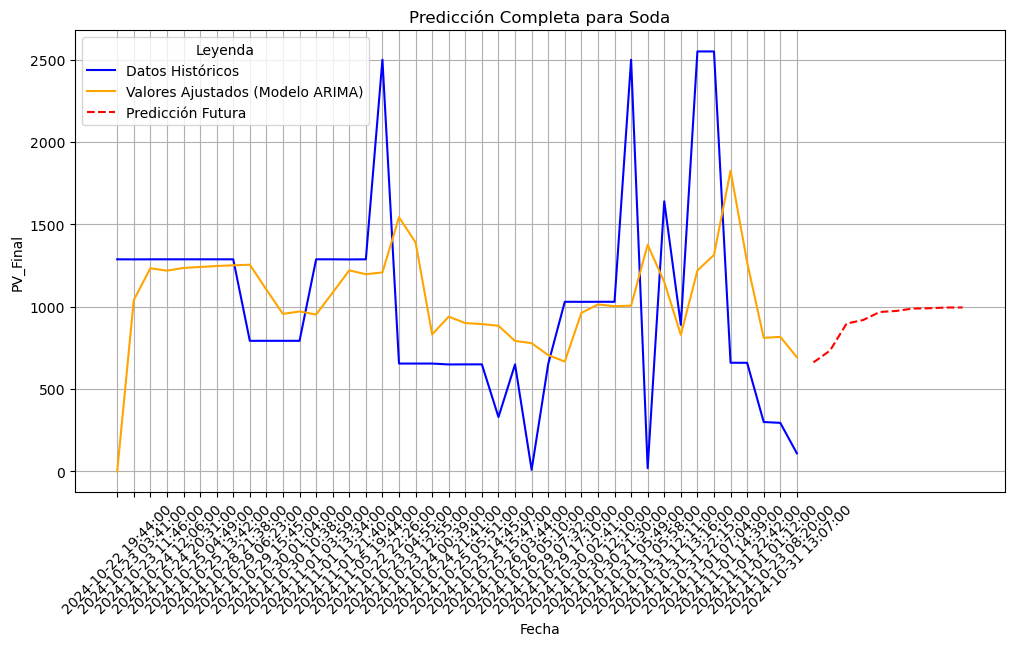


--- Visualización completa para Xilol ---


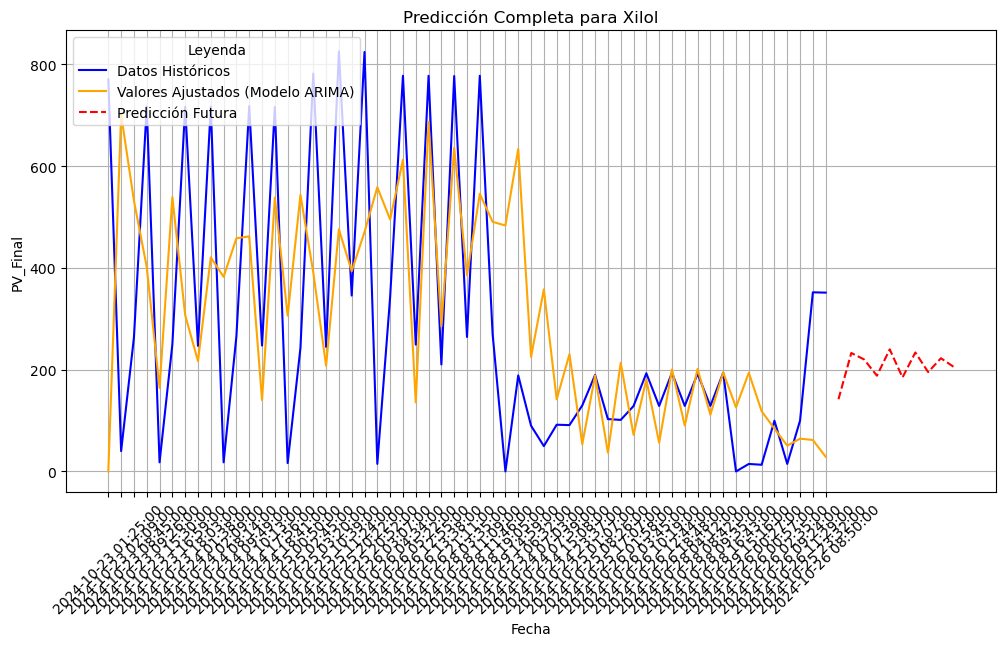


--- Visualización completa para Toluol ---


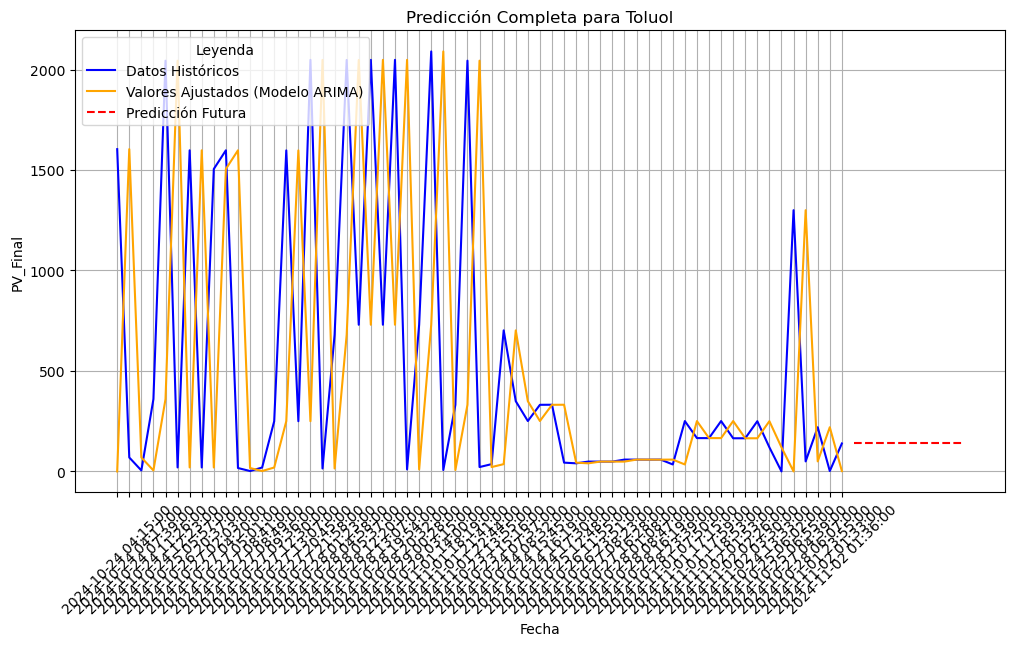


--- Visualización completa para 2EHA ---


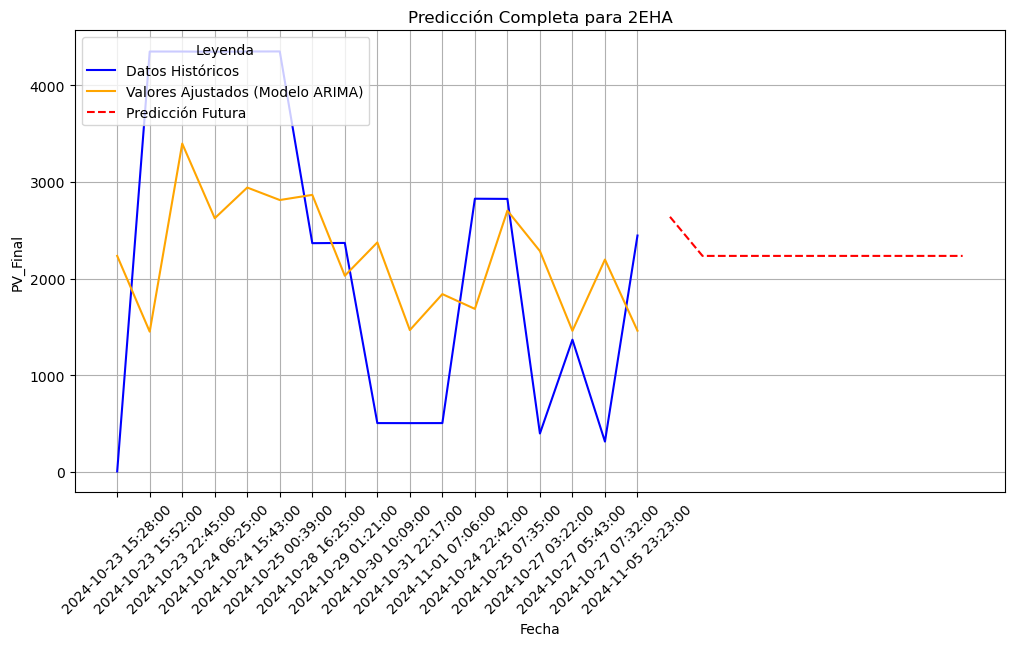


--- Visualización completa para Vam ---


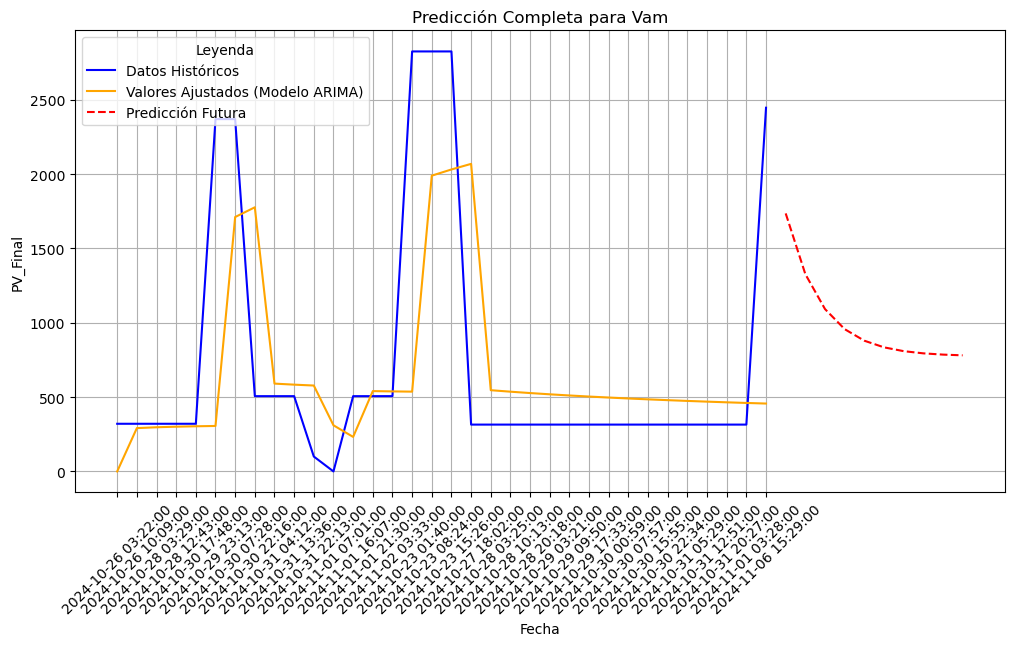


--- Visualización completa para Butil ---


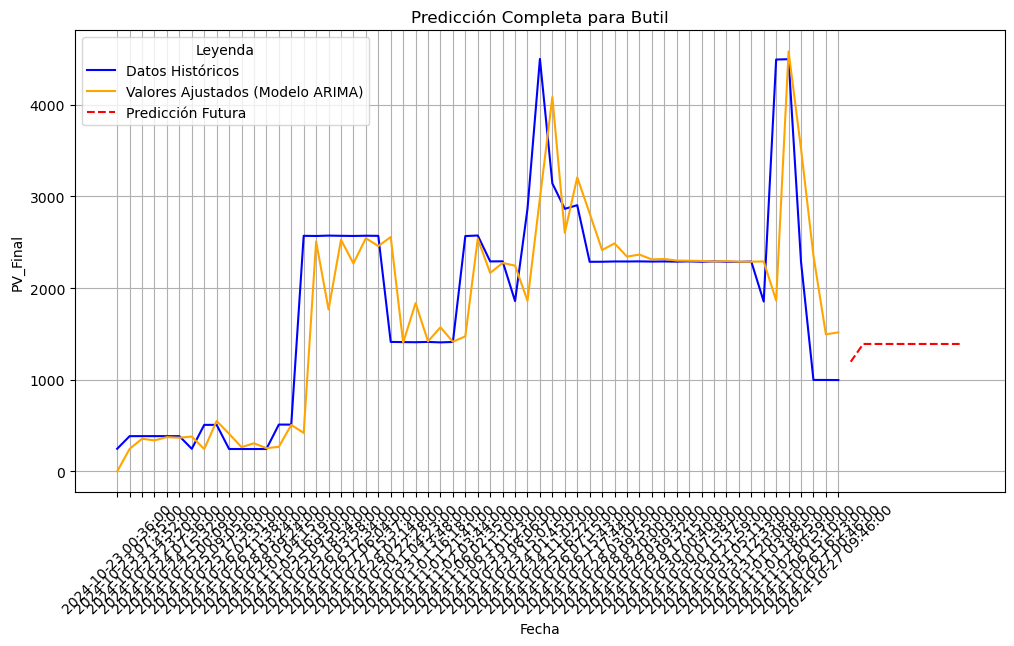


--- Visualización completa para Ethil ---


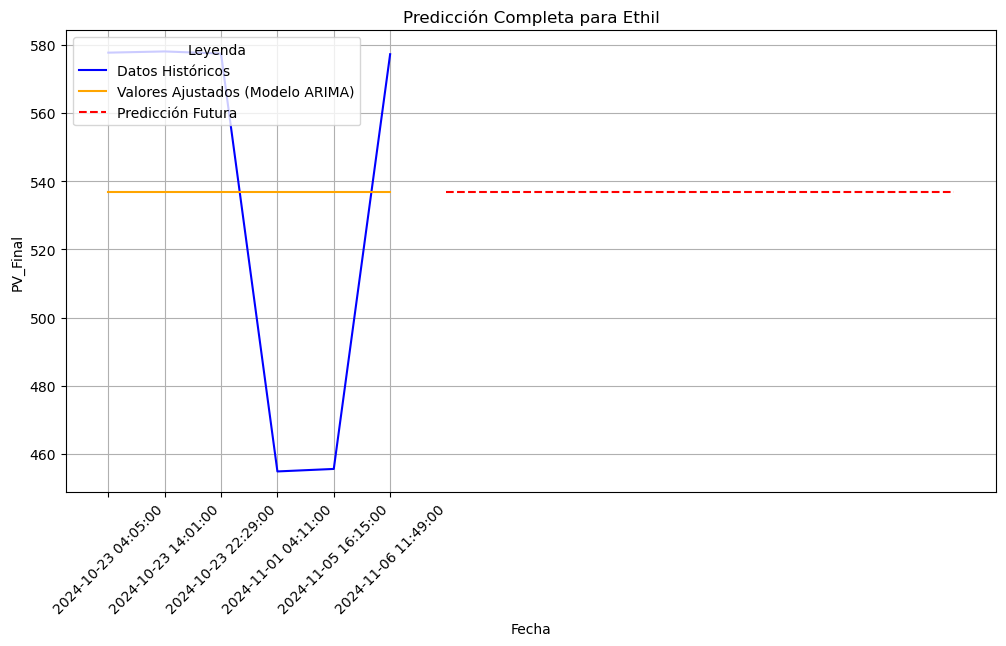


--- Visualización completa para Metil ---


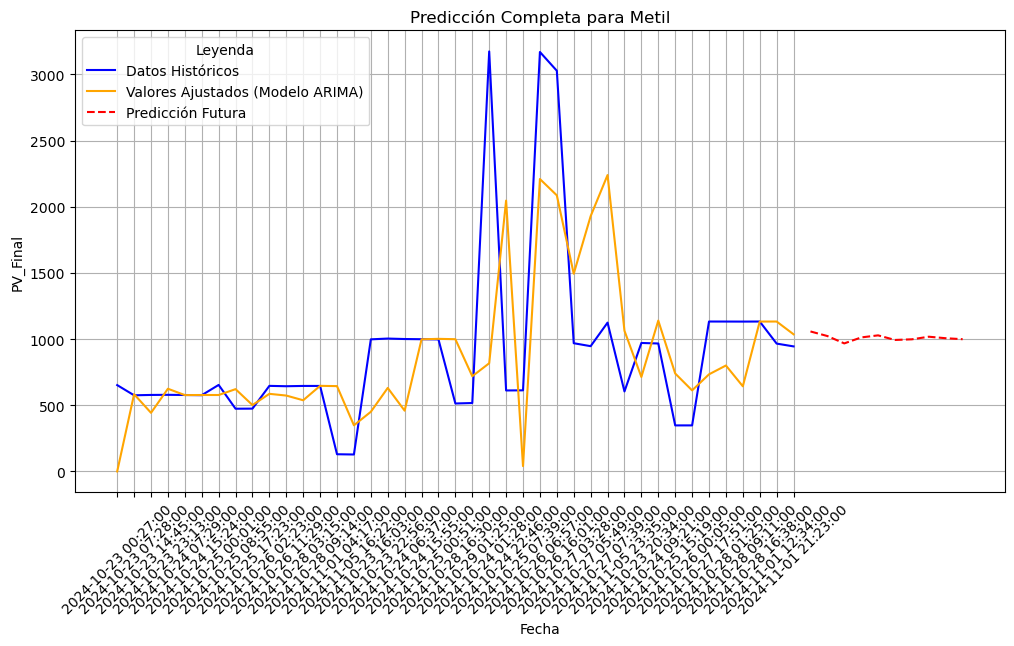


--- Visualización completa para Estireno ---


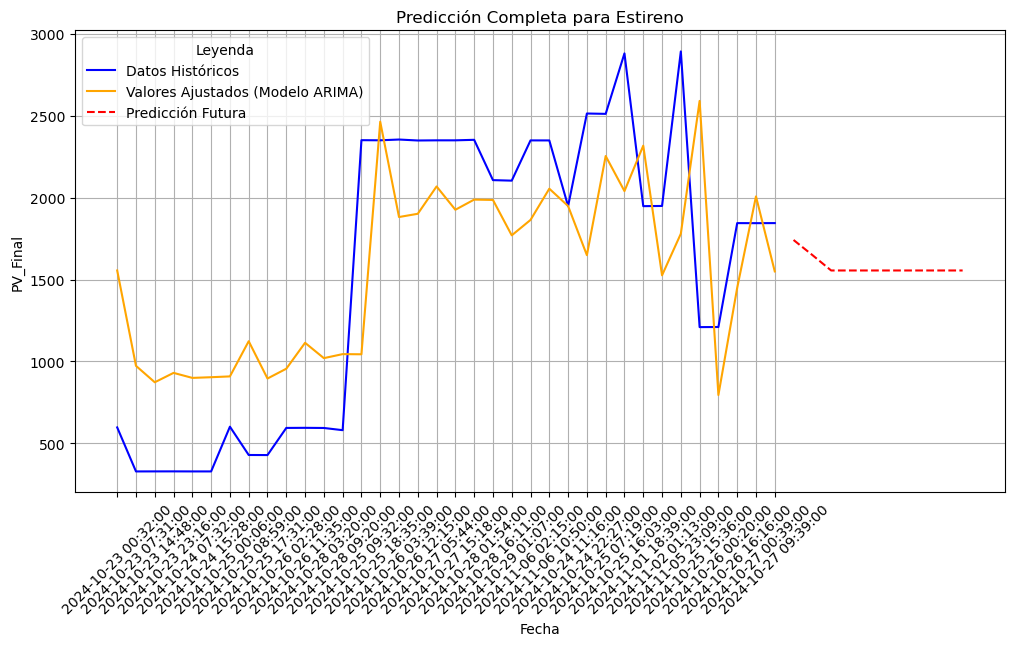

In [41]:

# Configurar los pasos a predecir
pasos_a_predecir = 10  # Ajusta el número de predicciones futuras según necesites

# Graficar el modelo ajustado sobre los datos históricos y las predicciones
for materia, params in mejores_parametros.items():
    print(f'\n--- Visualización completa para {materia} ---')
    
    # Filtrar los datos para cada MateriaPrima
    data_materia = MpTodos[MpTodos['MateriaPrima'] == materia].copy()
    # data_materia.set_index('Time_Stamp', inplace=True)
    serie = data_materia['PV_Final']
    
    # Extraer los mejores parámetros (p, d, q)
    p, d, q = params['parametros']
    
    # Ajustar el modelo ARIMA con los mejores parámetros
    modelo_final = ARIMA(serie, order=(p, d, q))
    resultado_final = modelo_final.fit()
    
    # Predecir los valores ajustados y las futuras predicciones
    valores_ajustados = resultado_final.fittedvalues
    prediccion_futura = resultado_final.forecast(steps=pasos_a_predecir)
    
    # Crear una gráfica que incluya:
    # - Datos históricos
    # - Valores ajustados por el modelo
    # - Predicciones futuras
    pyplot.figure(figsize=(12, 6))
    pyplot.plot(serie, label='Datos Históricos', color='blue')
    pyplot.plot(valores_ajustados, label='Valores Ajustados (Modelo ARIMA)', color='orange')
    pyplot.plot(prediccion_futura, label='Predicción Futura', color='red', linestyle='--')
    pyplot.title(f'Predicción Completa para {materia}')
    pyplot.xlabel('Fecha')
    pyplot.ylabel('PV_Final')
    pyplot.legend(title="Leyenda", loc="upper left")  # Agregar título a la leyenda y posición
    pyplot.xticks(rotation=45)  # Rotar las etiquetas del eje x
    pyplot.grid(True)  # Agregar cuadrícula para mejor visualización
    pyplot.show()
